# **Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import UndefinedMetricWarning

import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Defining Functions**

## **split_data( )**
### **spliting the data with the split percent provided in the parameters**

In [ ]:
def split_data(x,y,split_per):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_per, random_state = 42)
  return x_train, x_test, y_train, y_test

## **confusion_mx( )**
### **A function to display the confusion matrix**

In [ ]:
def confusion_mx(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix',size= 10)
    plt.show()

## **decision_tree( )**
### **Creating the model with Entropy as a measure of criterion then fit it to the x_train data and get the y_pred then displaying the Classification report and the Confusion matrix after the plot**

In [ ]:
def decision_tree(x_train, y_train, x_test, y_test, max_depth, split_size):
    # Using Entropy as a measure of node impurity
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    fn = header_names[:-1]
    cn = y.unique().astype(str)
    fig = plt.figure(figsize=(10, 6), dpi=300)
    tree.plot_tree(dtc, feature_names=fn, class_names=cn, filled=True, rounded=True)
    plt.text(0.5, 1.05, f"Max Depth: {max_depth}, Split Size: {split_size}", ha='center', va='center', transform=plt.gca().transAxes)
    plt.show()
    class_rep = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy * 100)
    print("Classification Report:")
    print(class_rep)
    print("Confusion Matrix:")
    cm = confusion_mx(y_test, y_pred)

# **Reading the Data**

In [ ]:
old_df = pd.read_csv("/content/KDD.csv")
old_df.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        181       5450     0               0       0    0   
1         0        239        486     0               0       0    0   
2         0        235       1337     0               0       0    0   
3         0        219       1337     0               0       0    0   
4         0        217       2032     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_srv_count  \
0                  0          1                0  ...                   9   
1                  0          1                0  ...                  19   
2                  0          1                0  ...                  29   
3                  0          1                0  ...                  39   
4                  0          1                0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  target  
0                       0.0       0  
1                       0.0       0  
2                       0.0       0  
3                       0.0       0  
4                       0.0       0  

[5 rows x 39 columns]

In [ ]:
old_df.shape[1]

39

**Checking for NULL values**

In [ ]:
print(old_df.isnull().sum())

duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

 **Dividing data for input and target**

In [ ]:
x = old_df.drop("target", axis=1)
y = old_df["target"]

# **Dividing data and showing classification report**


**First we normalize the input data using MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
new_x = scaler.fit_transform(x)
new_x = pd.DataFrame(new_x, columns=x.columns)

**Select the top 9 features using SelectKBest (9 inputs + 1 target)**

In [ ]:
K_select = SelectKBest(score_func=f_classif, k=9)
x_new = K_select.fit_transform(new_x, y)
top_feats = new_x.columns[K_select.get_support()]
my_data = pd.concat([new_x[top_feats], y], axis=1)
my_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


logged_in     count  srv_count  serror_rate  same_srv_rate  \
0        1.0  0.015656   0.015656          0.0            1.0   
1        1.0  0.015656   0.015656          0.0            1.0   
2        1.0  0.015656   0.015656          0.0            1.0   
3        1.0  0.011742   0.011742          0.0            1.0   
4        1.0  0.011742   0.011742          0.0            1.0   

   srv_diff_host_rate  dst_host_count  dst_host_same_src_port_rate  \
0                 0.0        0.035294                         0.11   
1                 0.0        0.074510                         0.05   
2                 0.0        0.113725                         0.03   
3                 0.0        0.152941                         0.03   
4                 0.0        0.192157                         0.02   

   dst_host_srv_serror_rate  target  
0                       0.0       0  
1                       0.0       0  
2                       0.0       0  
3                       0.0       0  
4                       0.0       0

 **Dividing new data for input and target**

In [ ]:
x = my_data.drop("target", axis=1)
y = my_data["target"]
header_names = my_data.columns.tolist()

**Iterating over the split sizes and splitting the data and print the Classification report for each split size**

In [ ]:
split_sizes = [0.3, 0.4, 0.5]#Pre-defined split sizes
for idx,size in enumerate(split_sizes):
    x_train, x_test, y_train, y_test = split_data(x,y,size)
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    class_rep = classification_report(y_test, y_pred)
    print(f"Classification Report for my_data_{idx+1}:")
    print(class_rep)
    print("----------------------------------------------")

Classification Report for my_data_1:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207

----------------------------------------------
Classification Report for my_data_2:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609

----------------------------------------------
Classification Report for my_data_3:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.9

**Plot histograms for the best 9 features and the target variable**

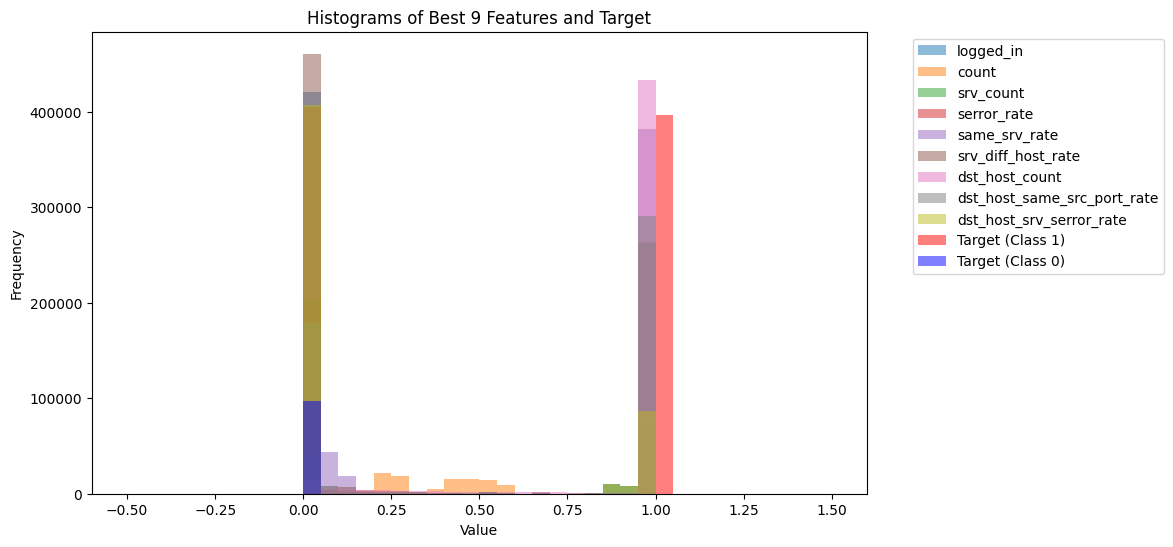

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for col in top_feats:
    ax.hist(my_data[col], bins=20, alpha=0.5, label=col)

ax.hist(my_data.loc[my_data["target"] == 1, "target"], bins=20, alpha=0.5, label="Target (Class 1)", color='red')
ax.hist(my_data.loc[my_data["target"] == 0, "target"], bins=20, alpha=0.5, label="Target (Class 0)", color='blue')

ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Histograms of Best 9 Features and Target")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# **Visualize the decision trees**
## **Iterating over the three pre-defined max depths in each split size we have**

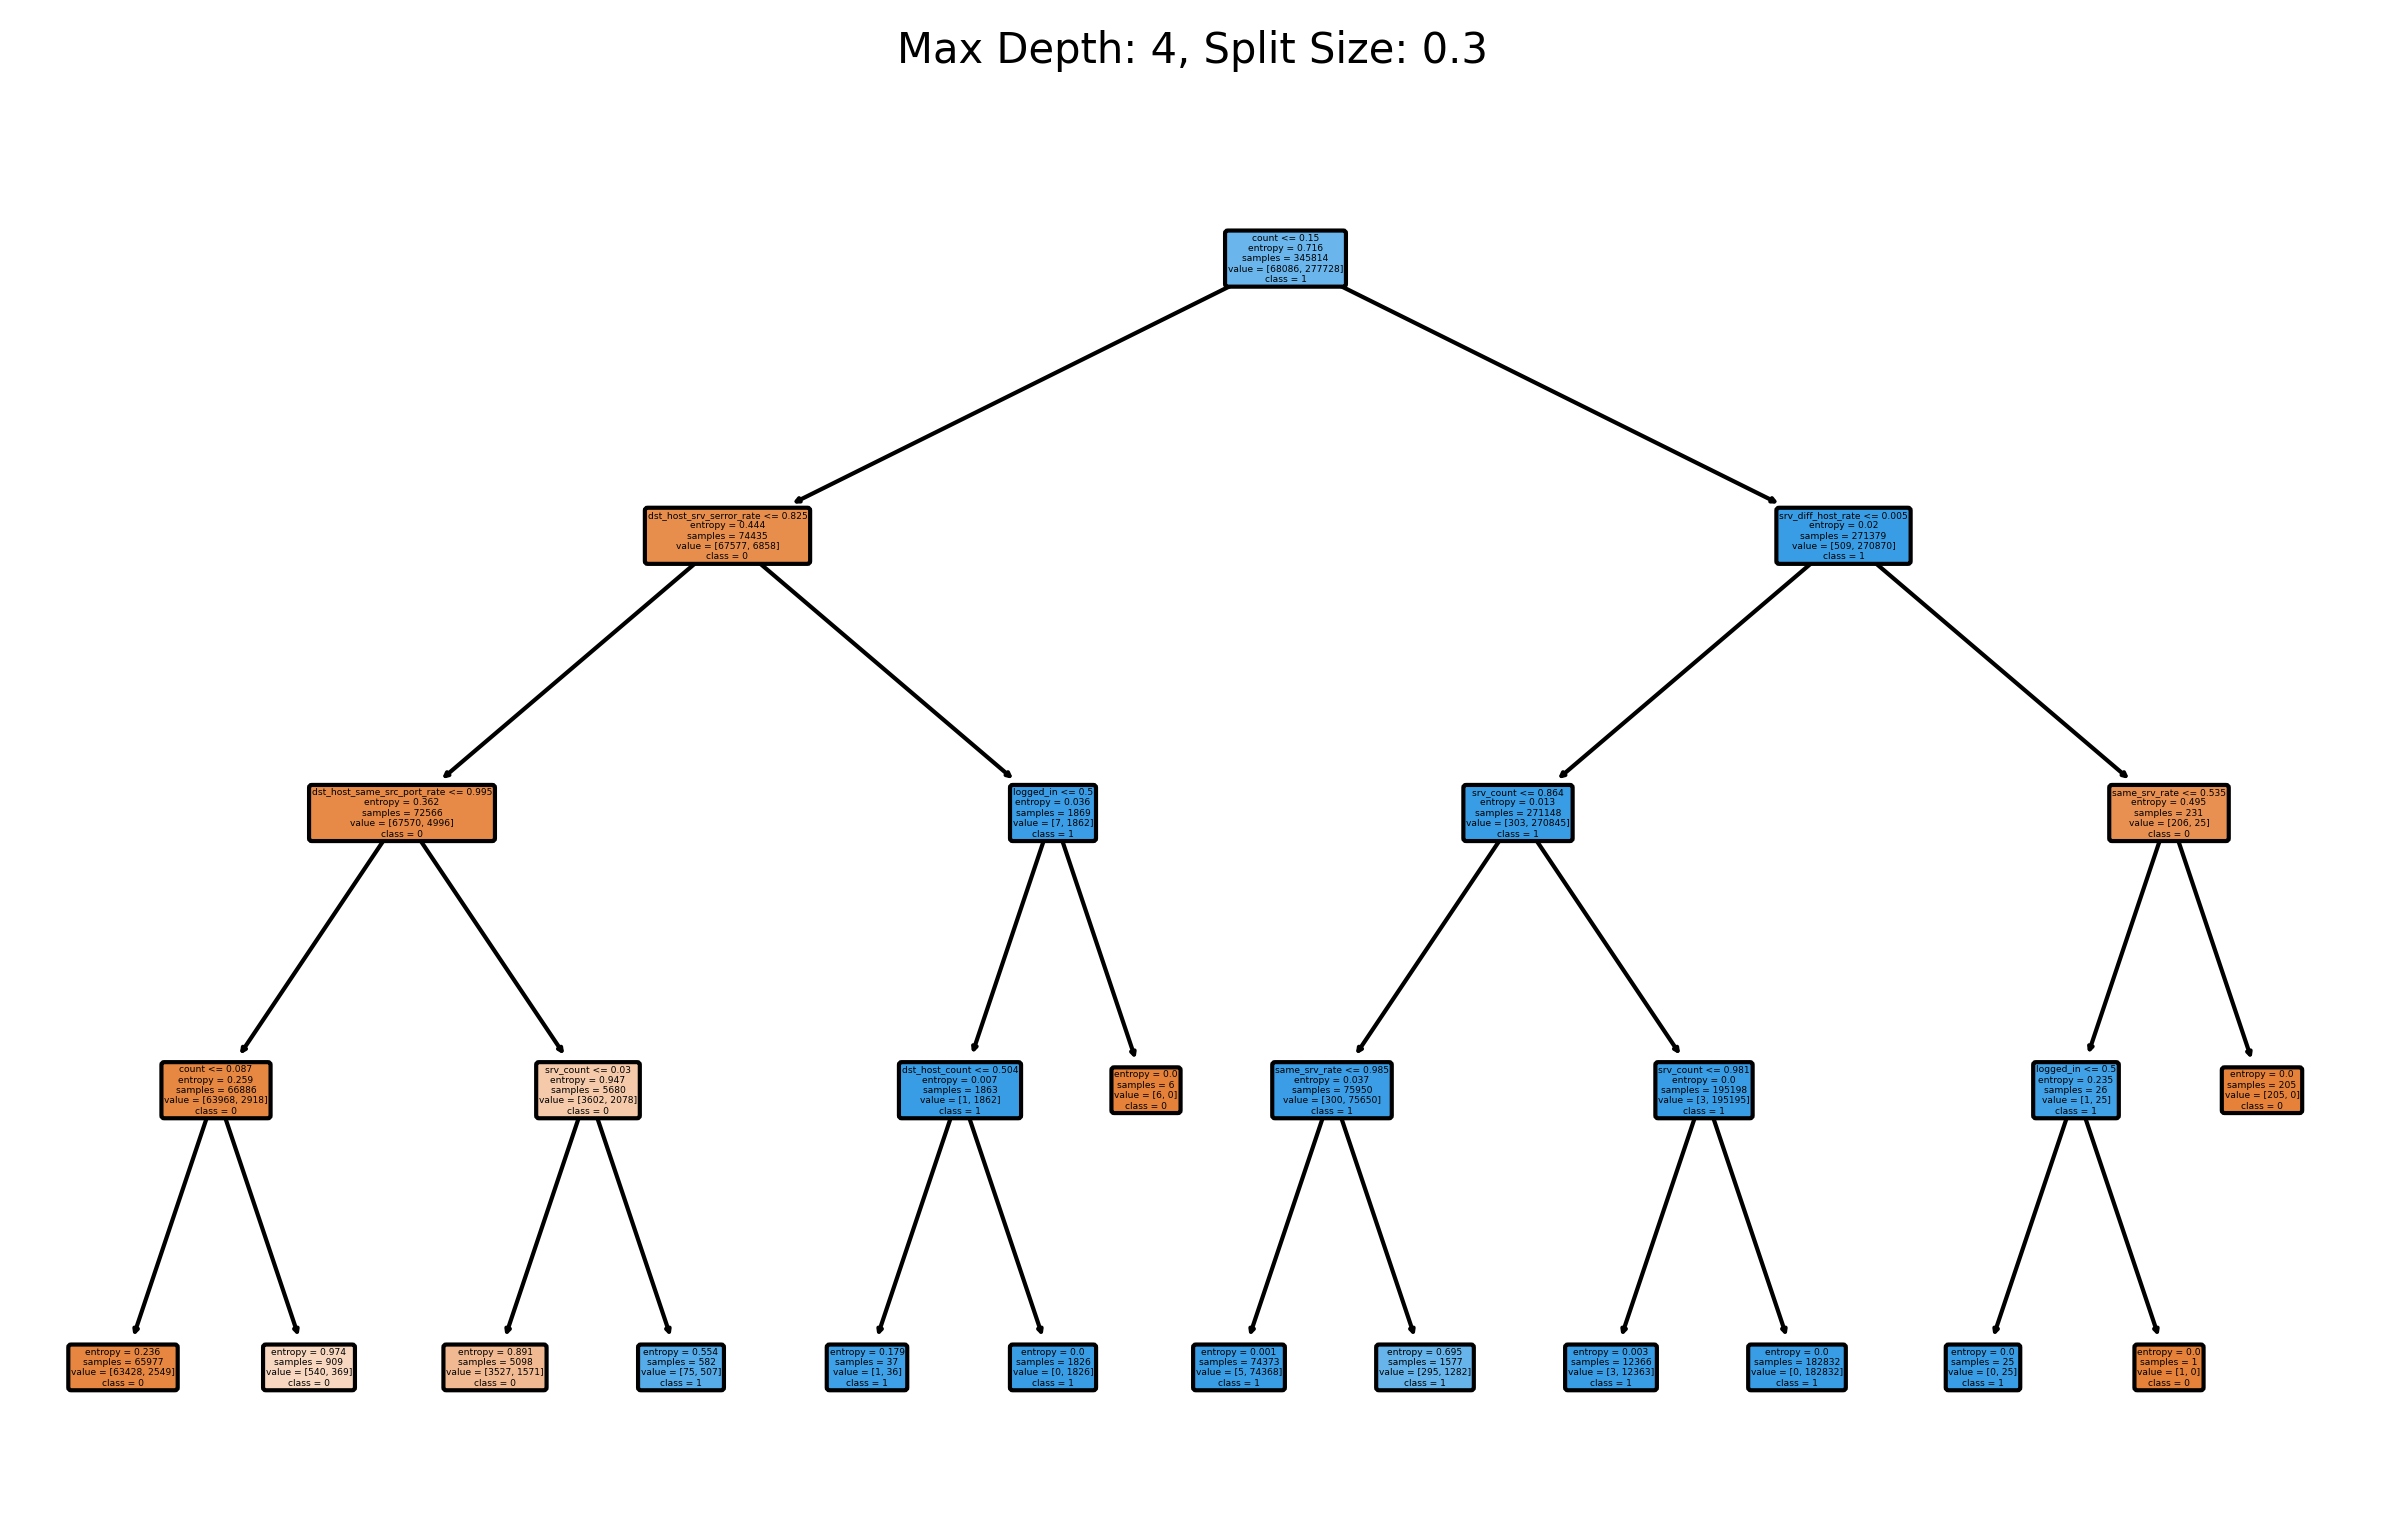

Accuracy: 98.57226716686796
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     29192
           1       1.00      0.98      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion Matrix:


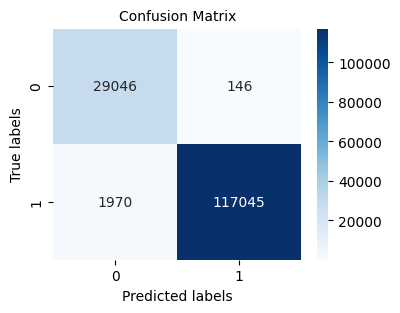

------------------------------------------------------------------------------------------------------------



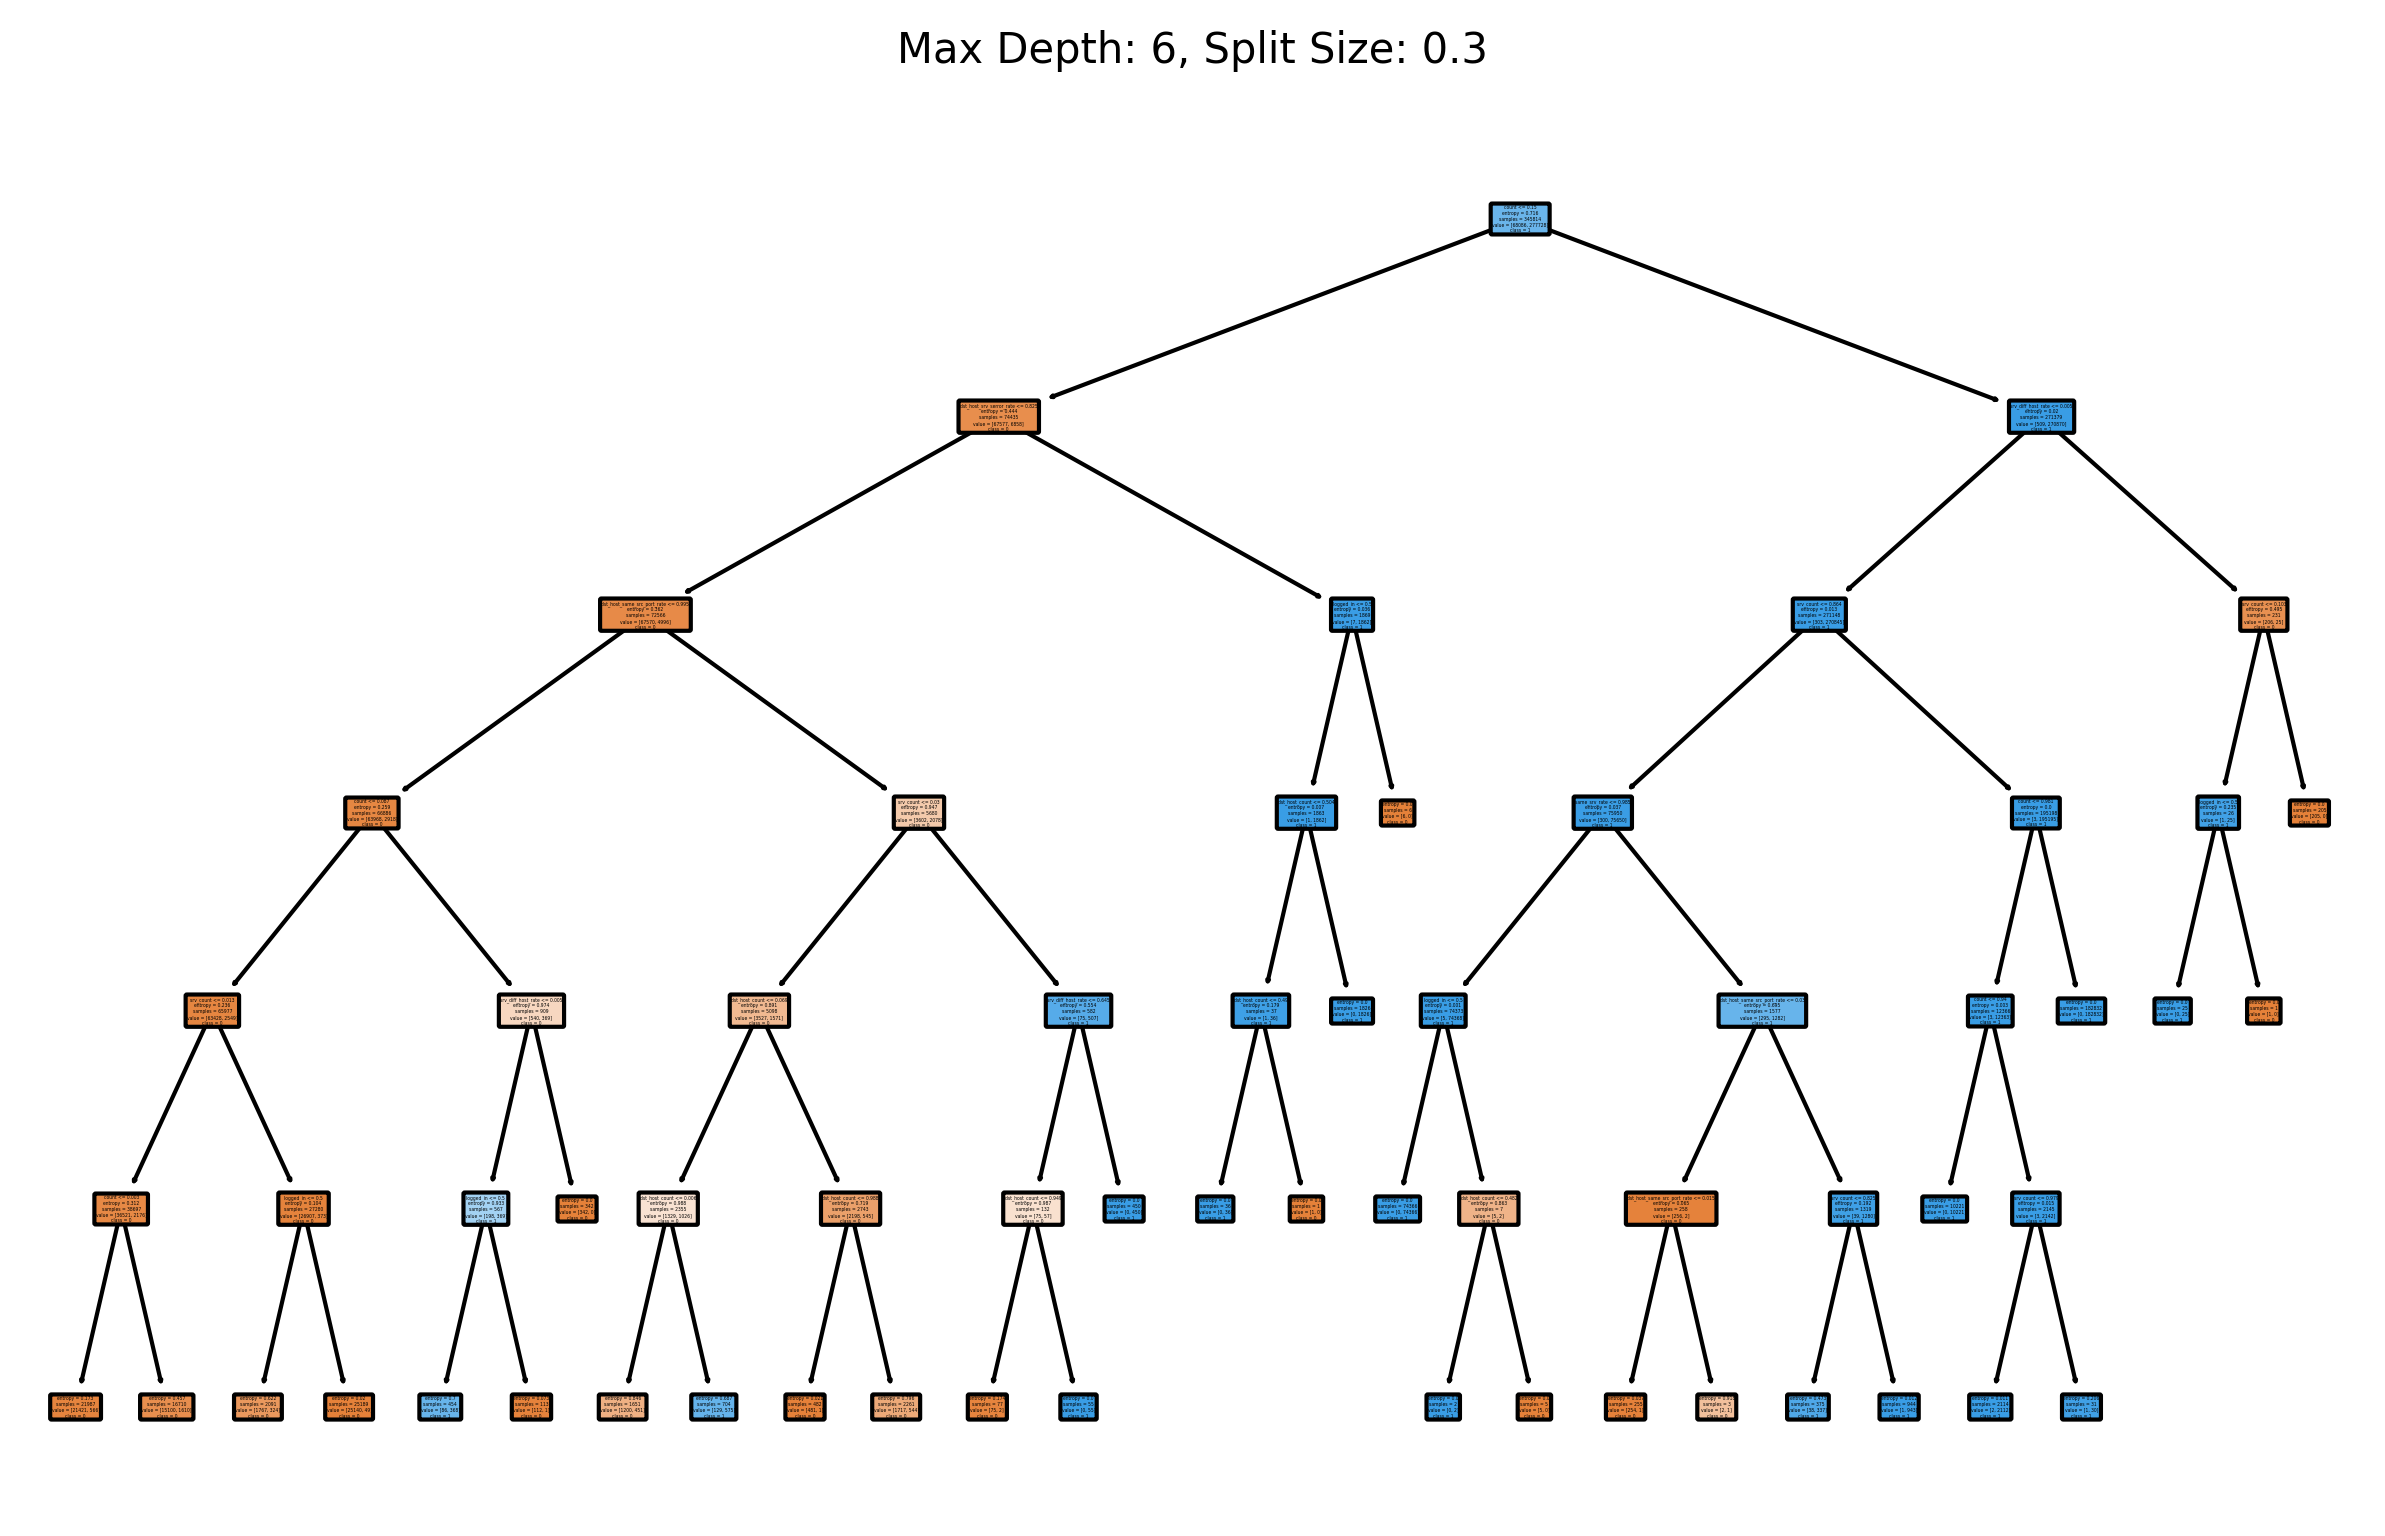

Accuracy: 98.8522809314
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion Matrix:


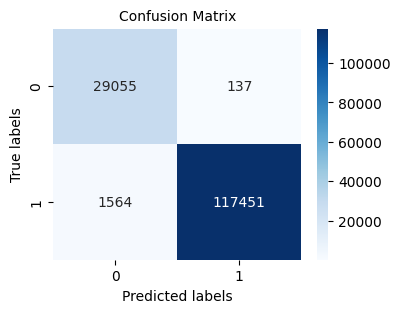

------------------------------------------------------------------------------------------------------------



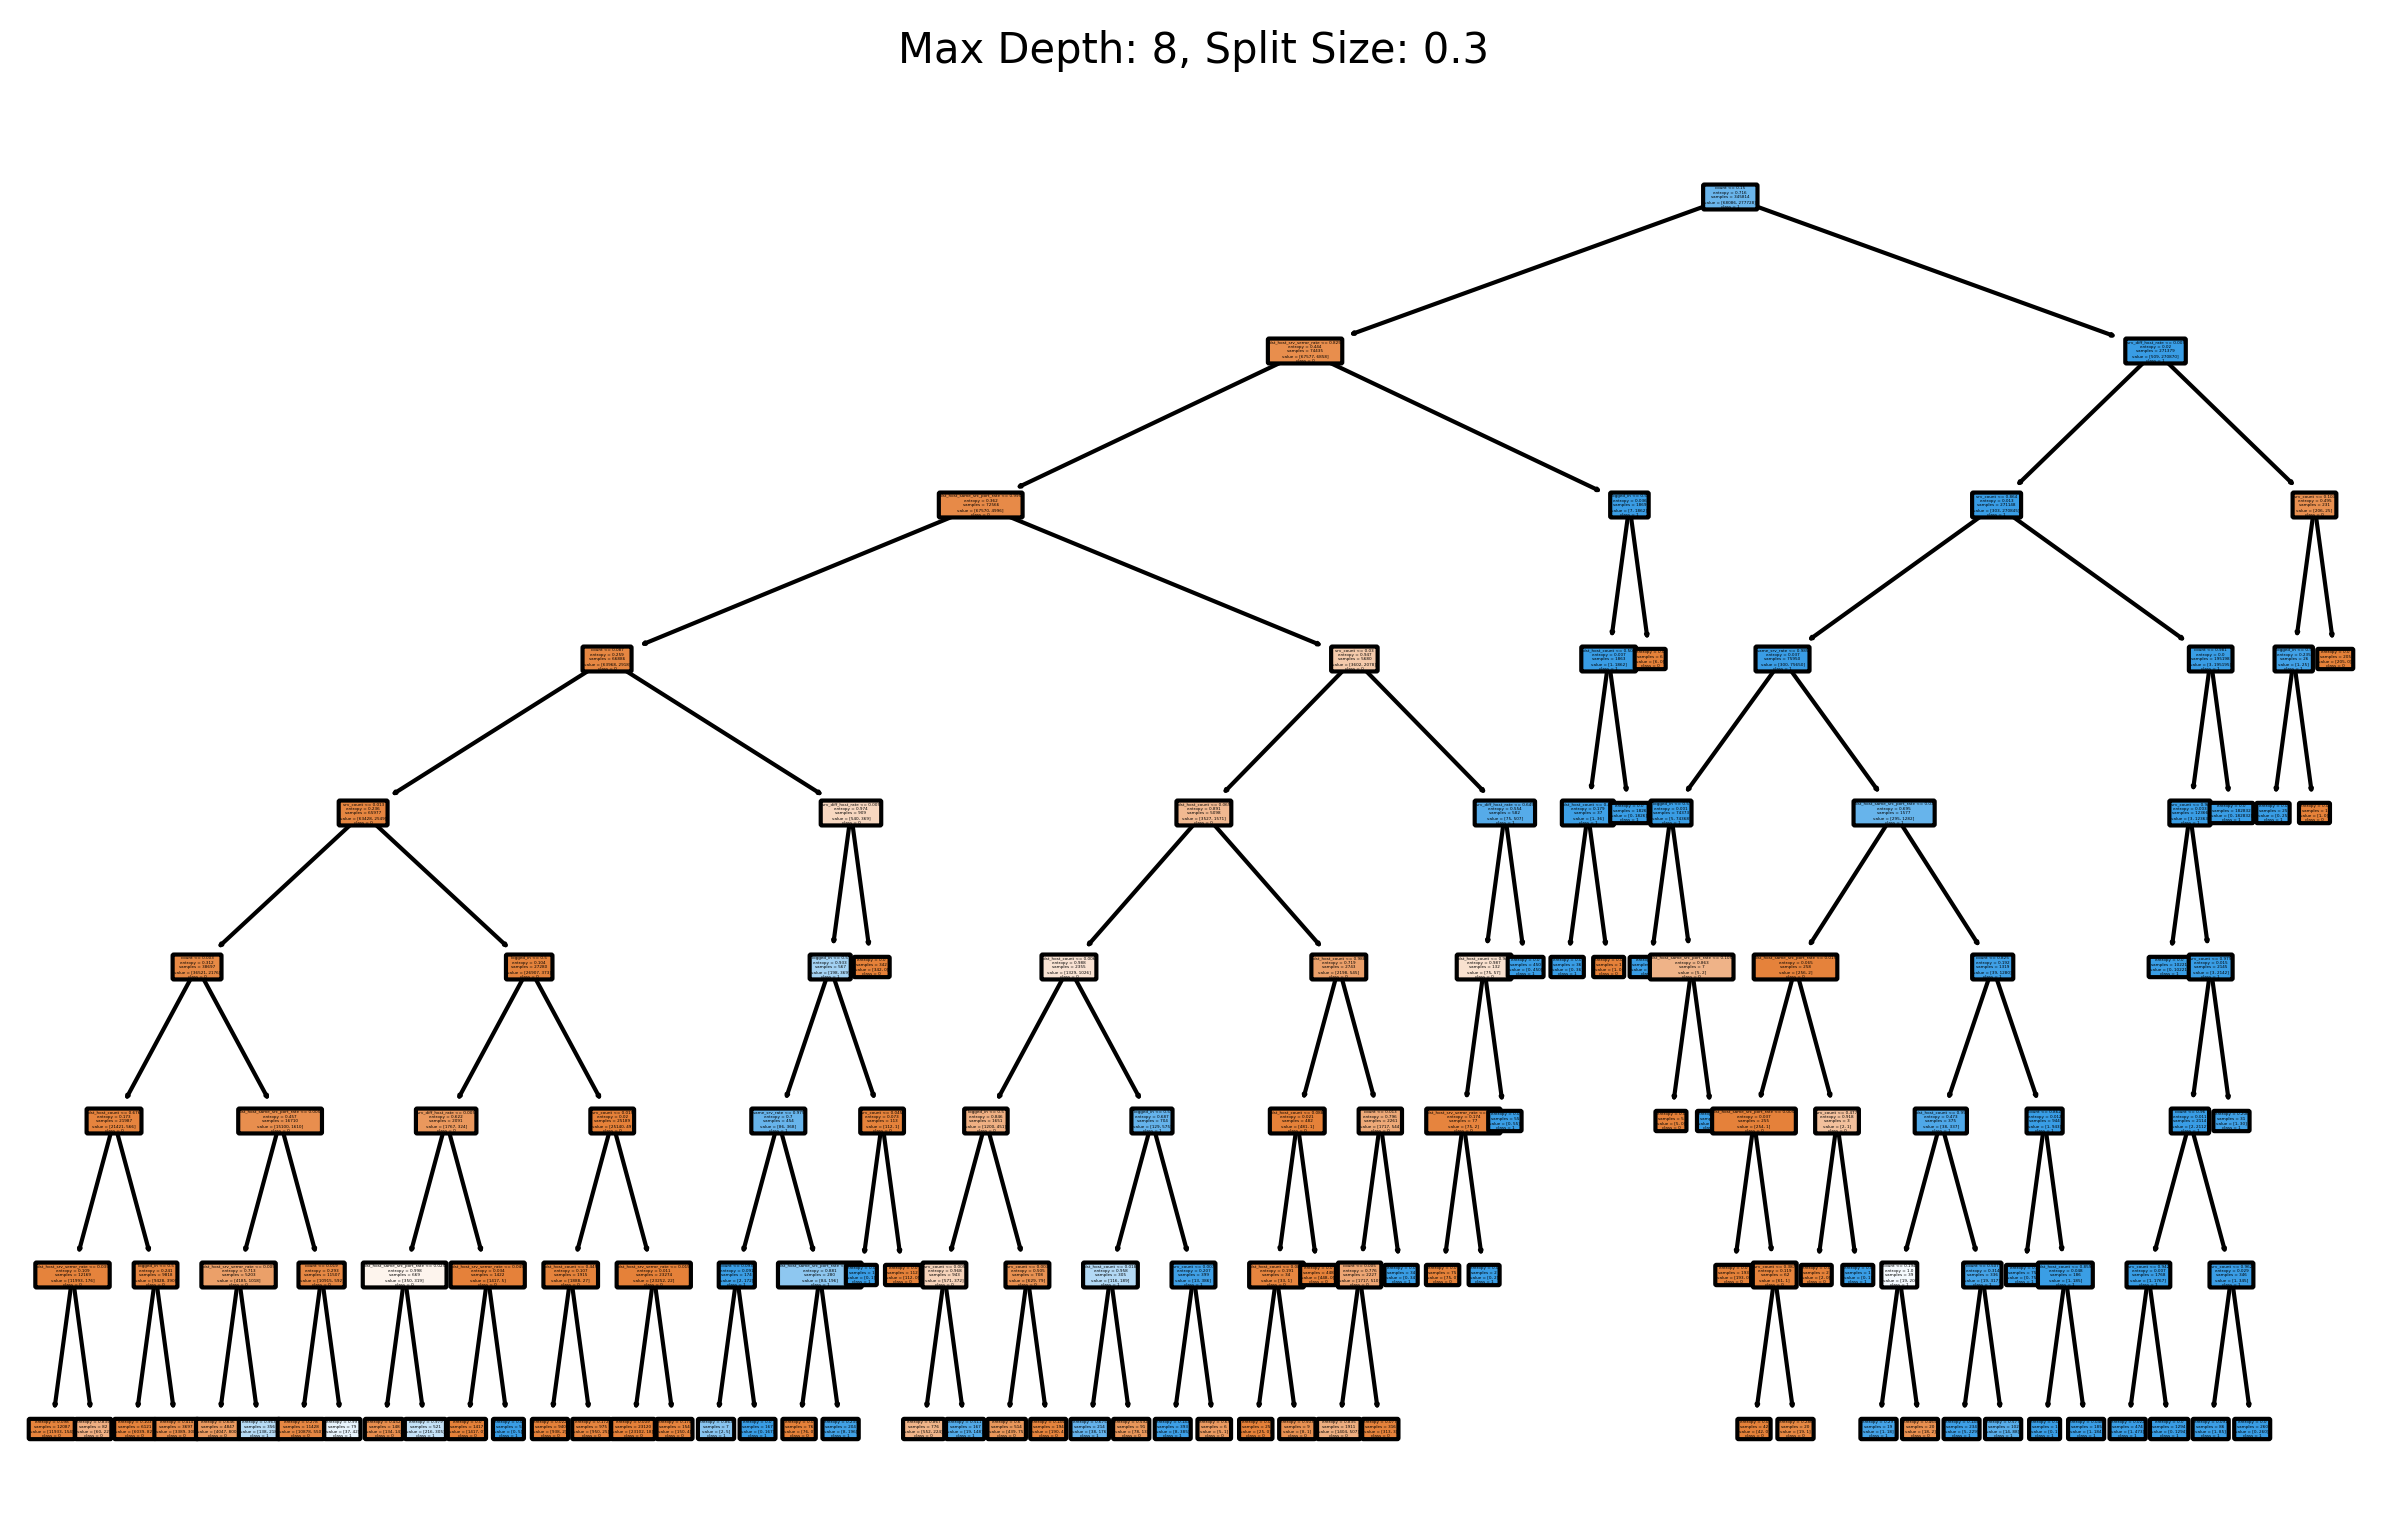

Accuracy: 99.01219240656648
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion Matrix:


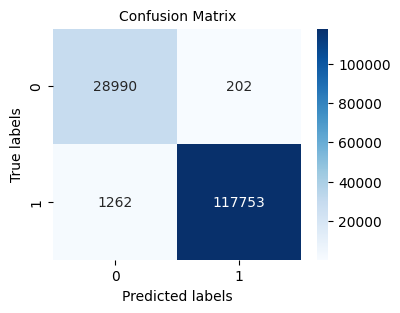

------------------------------------------------------------------------------------------------------------



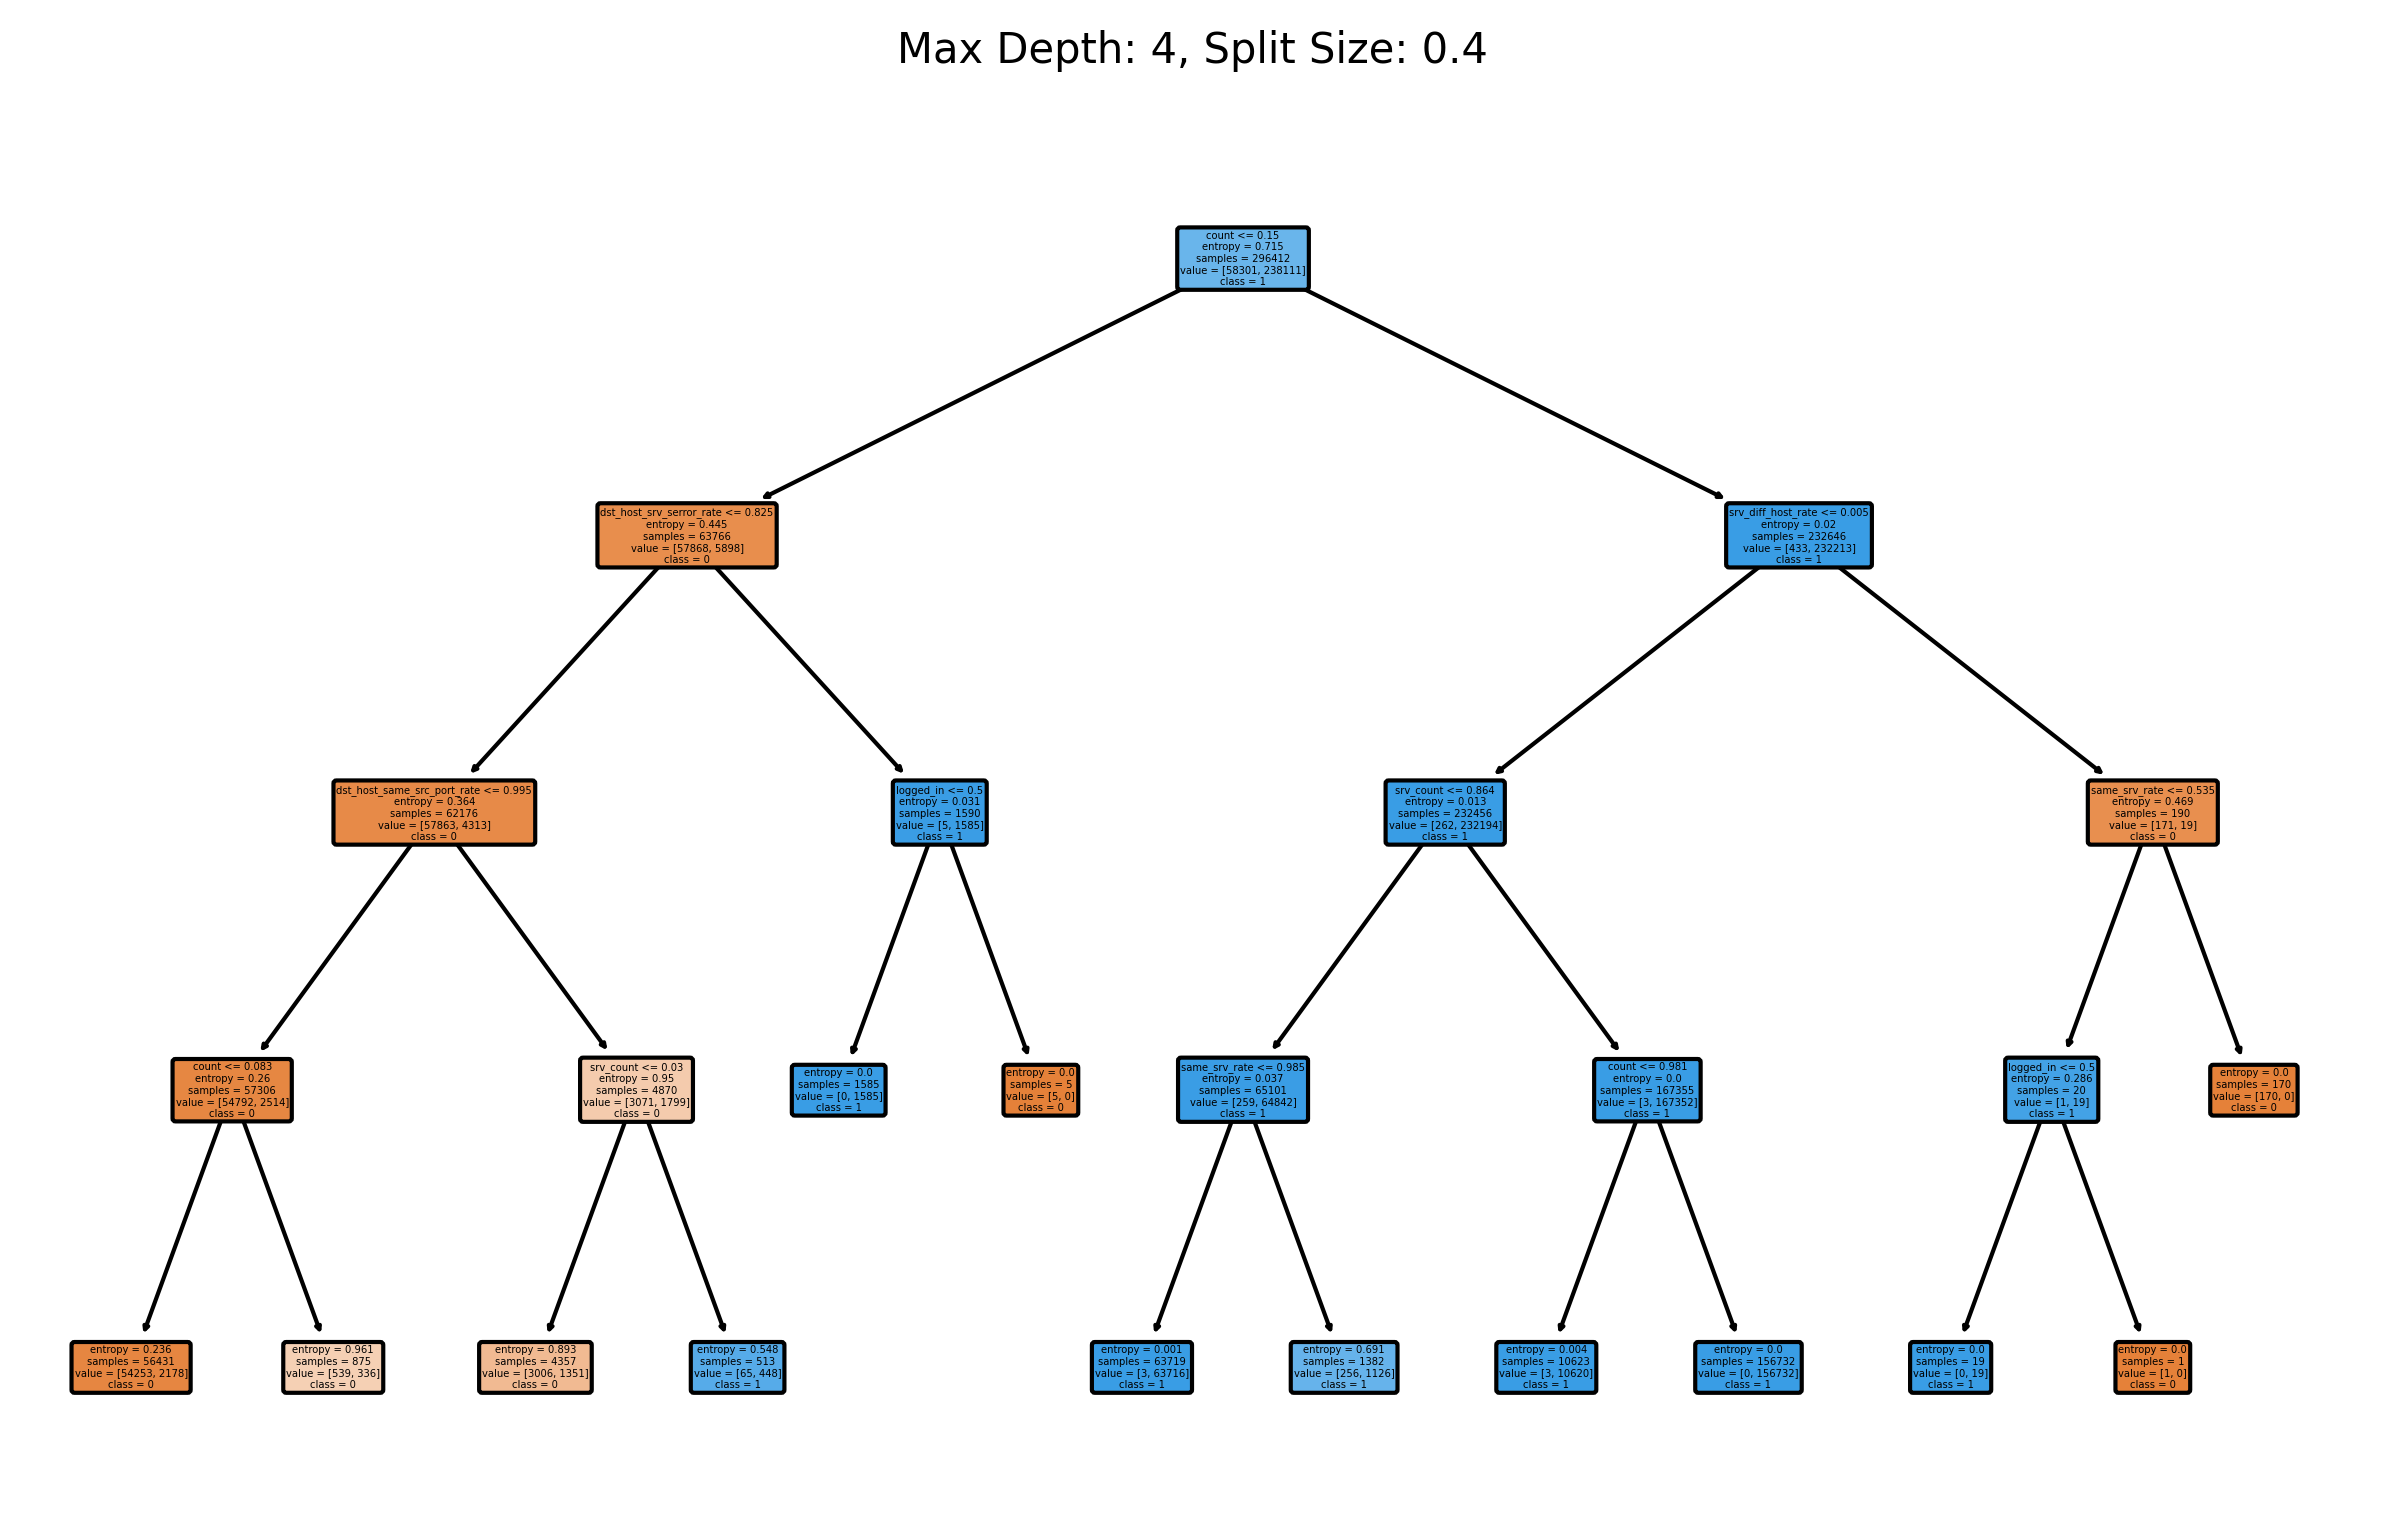

Accuracy: 98.58710888674099
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     38977
           1       1.00      0.98      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion Matrix:


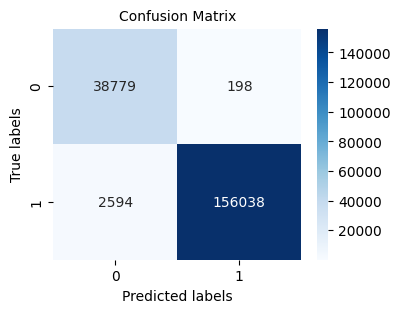

------------------------------------------------------------------------------------------------------------



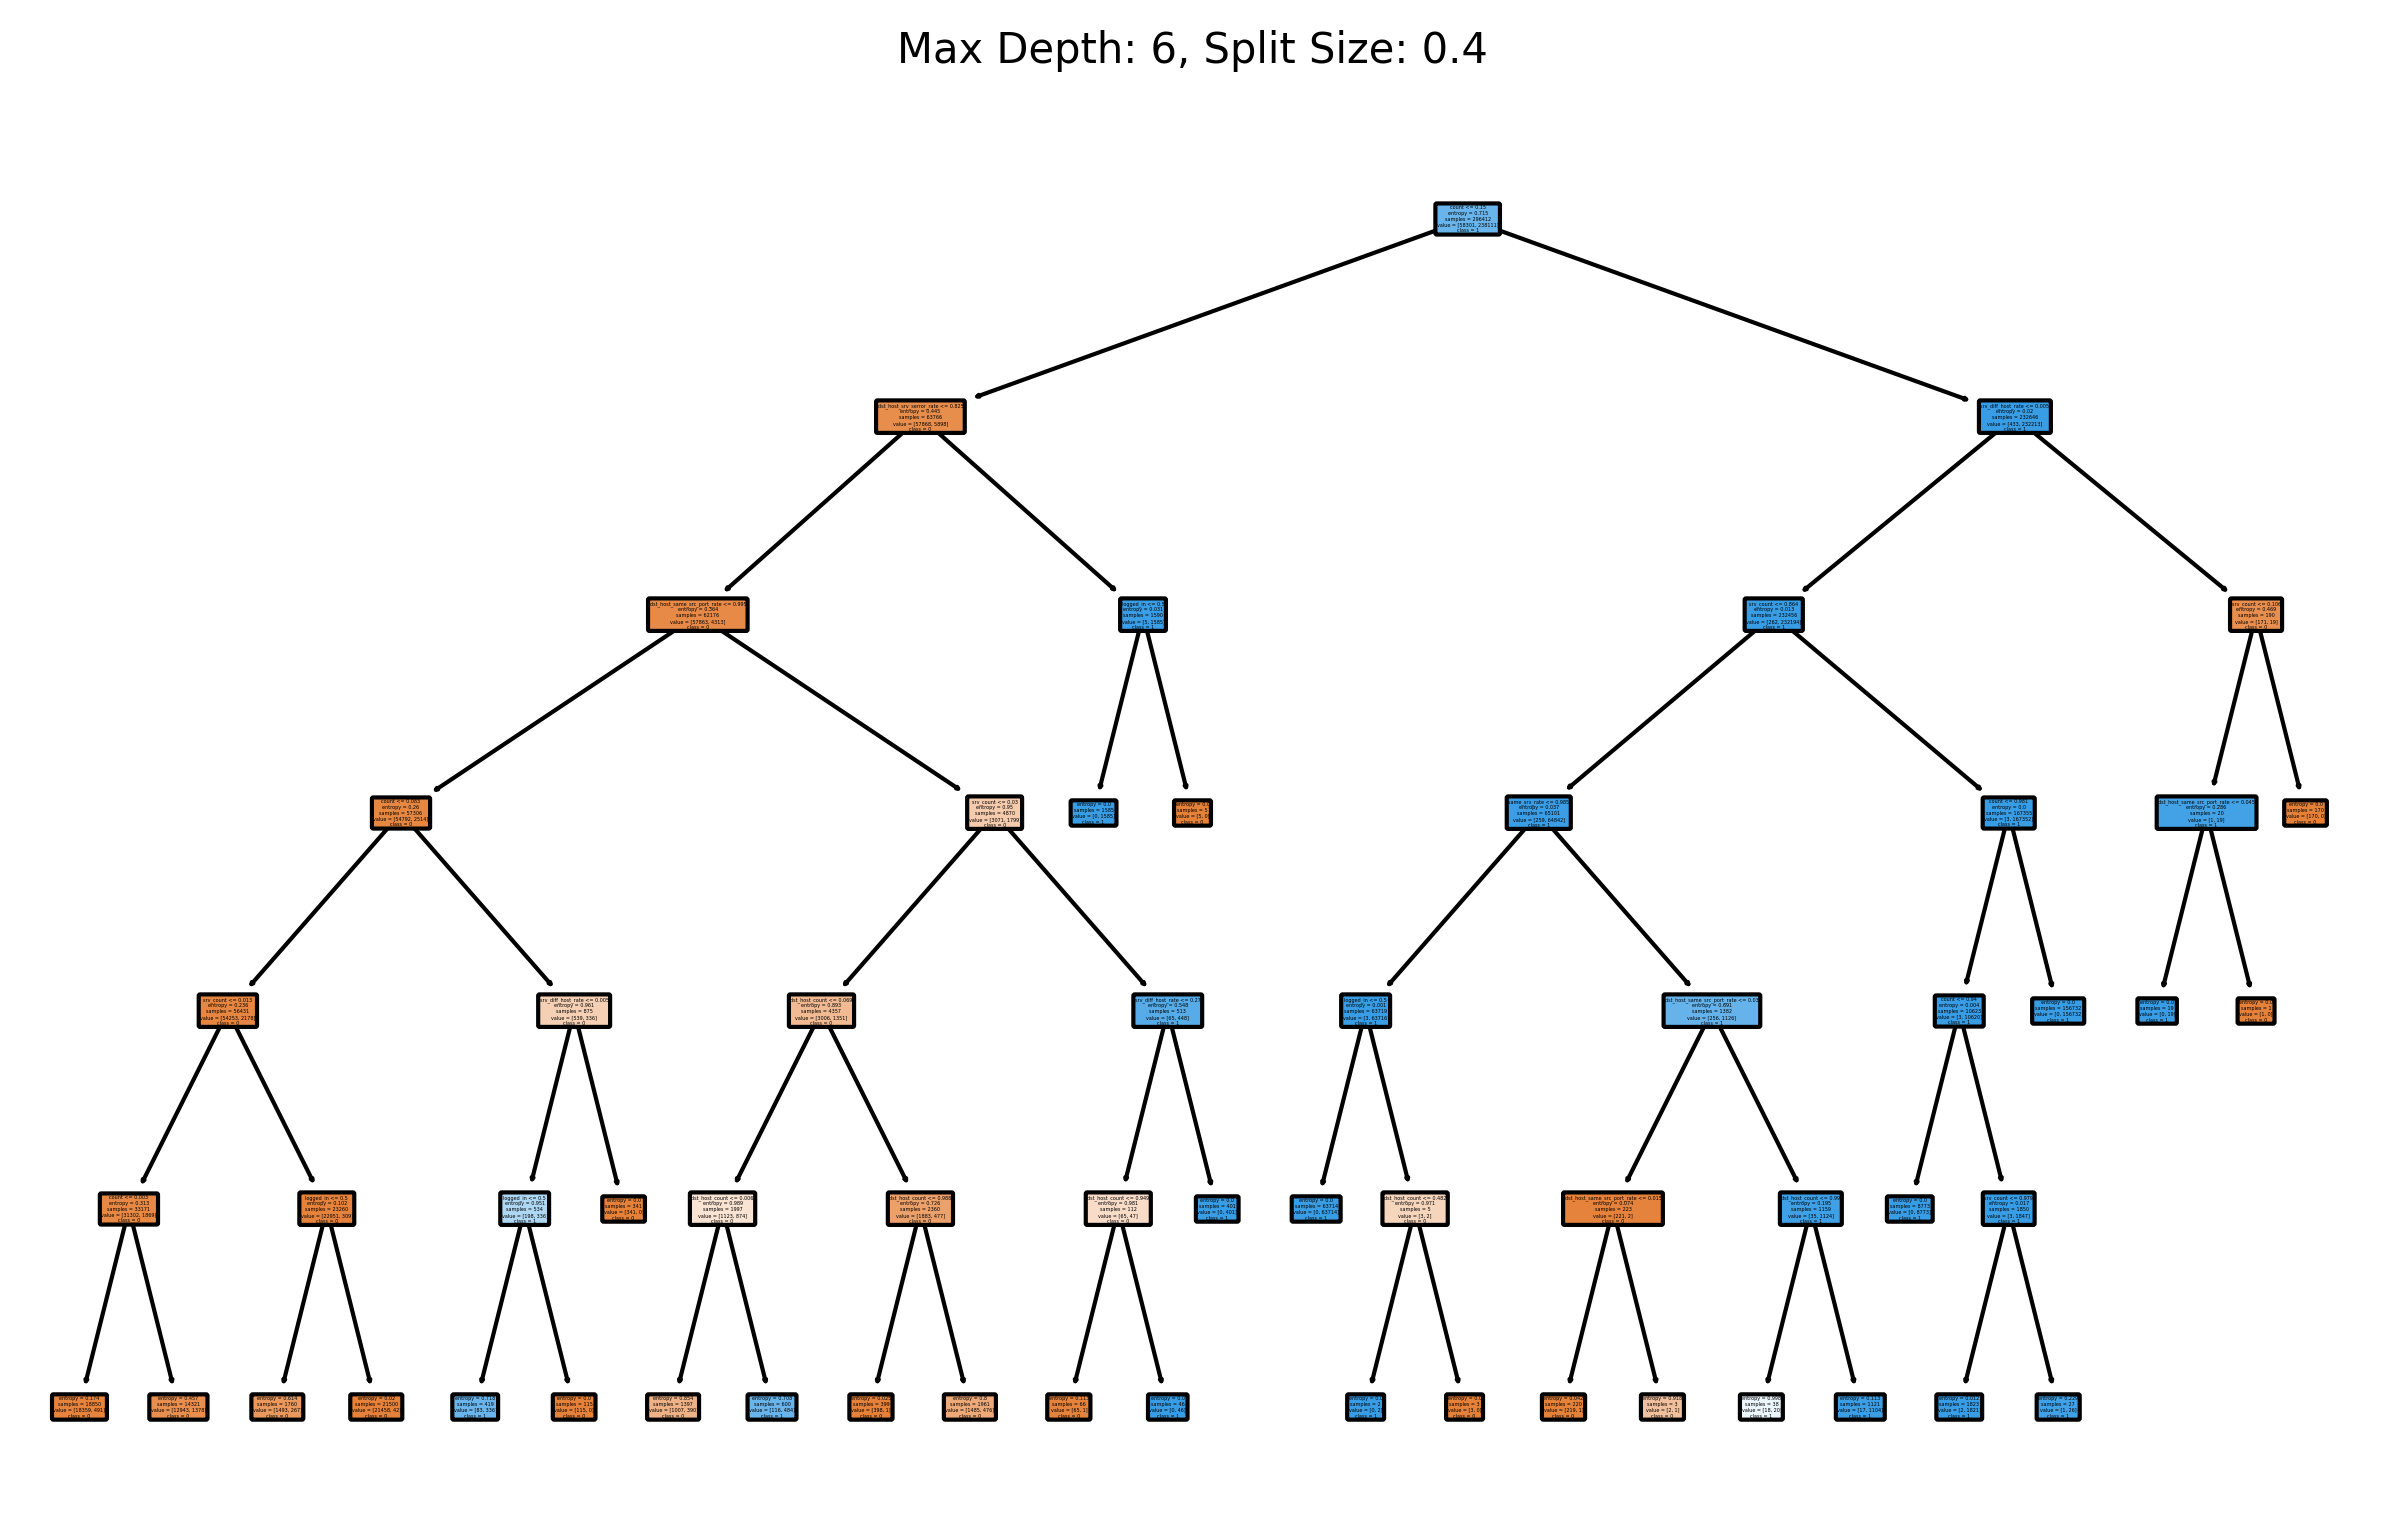

Accuracy: 98.87758148667318
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion Matrix:


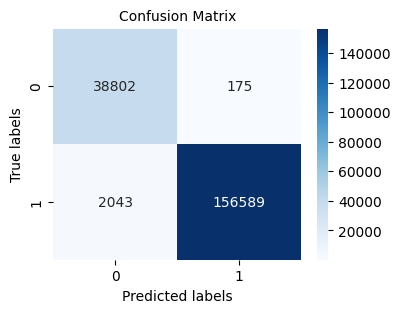

------------------------------------------------------------------------------------------------------------



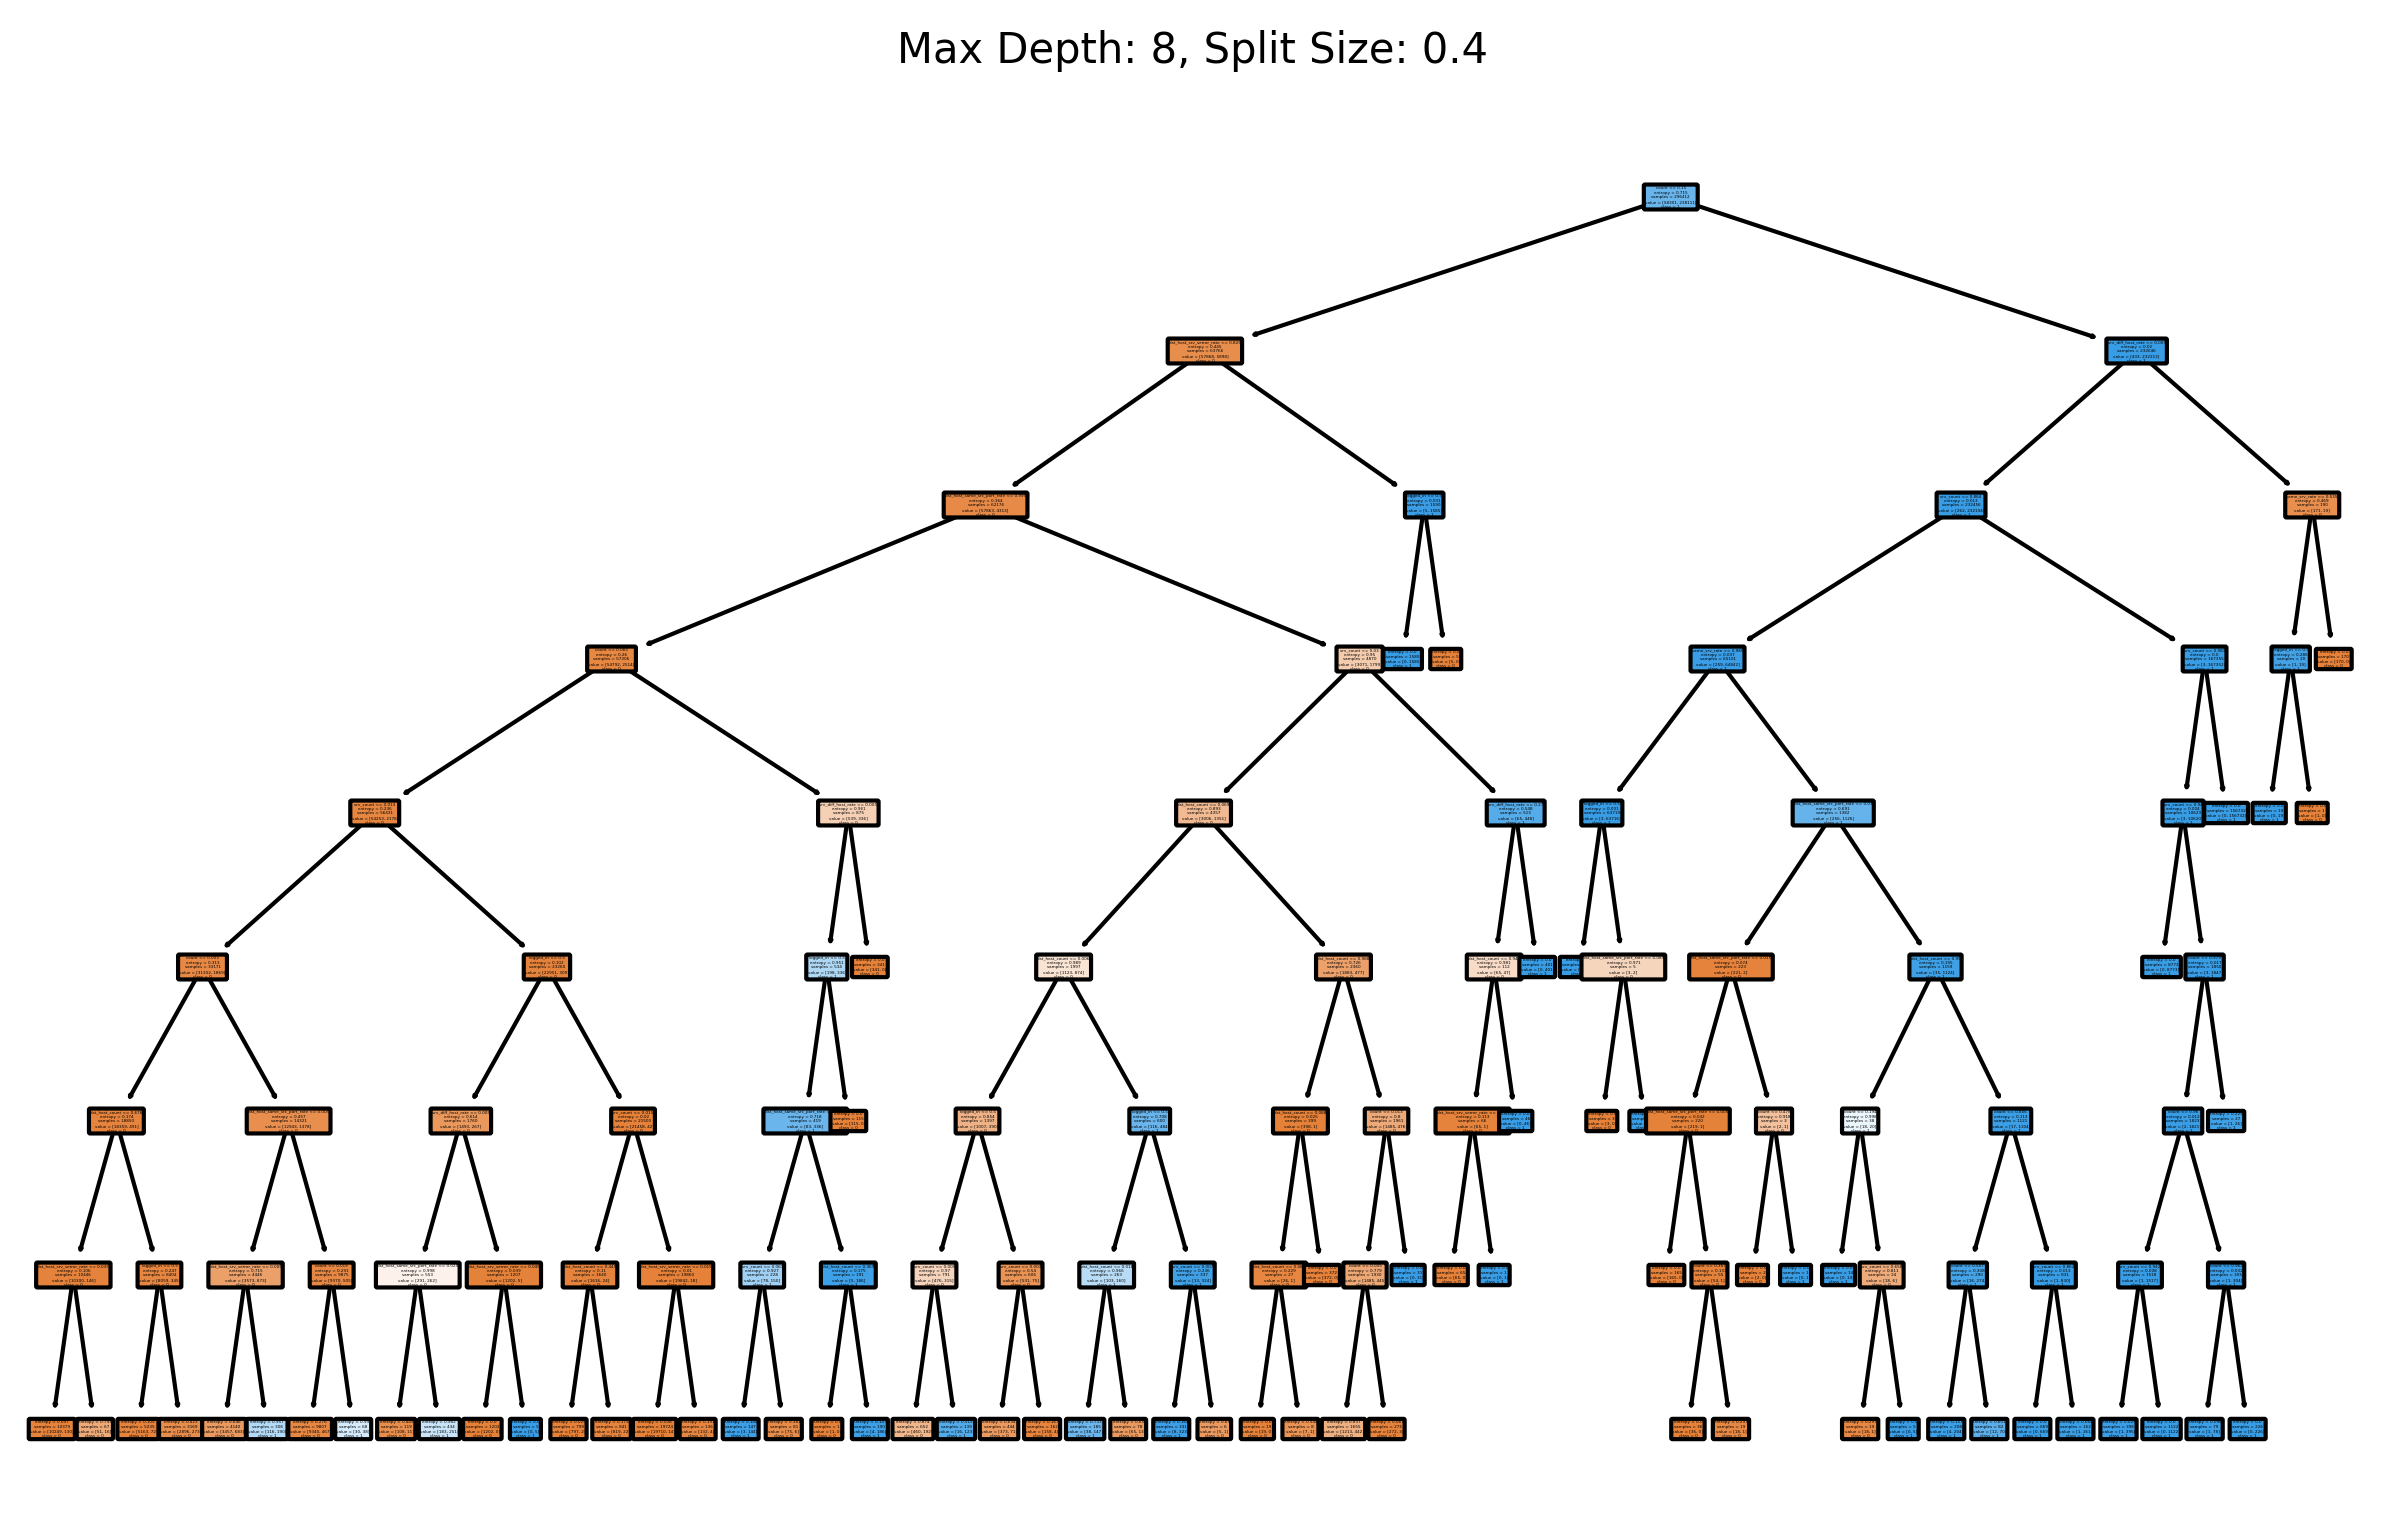

Accuracy: 99.02484198594193
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion Matrix:


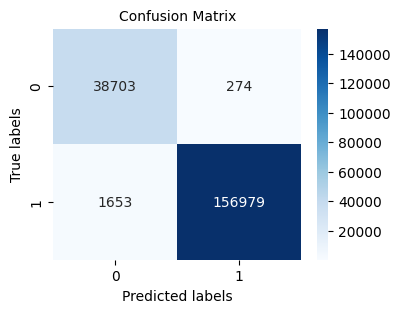

------------------------------------------------------------------------------------------------------------



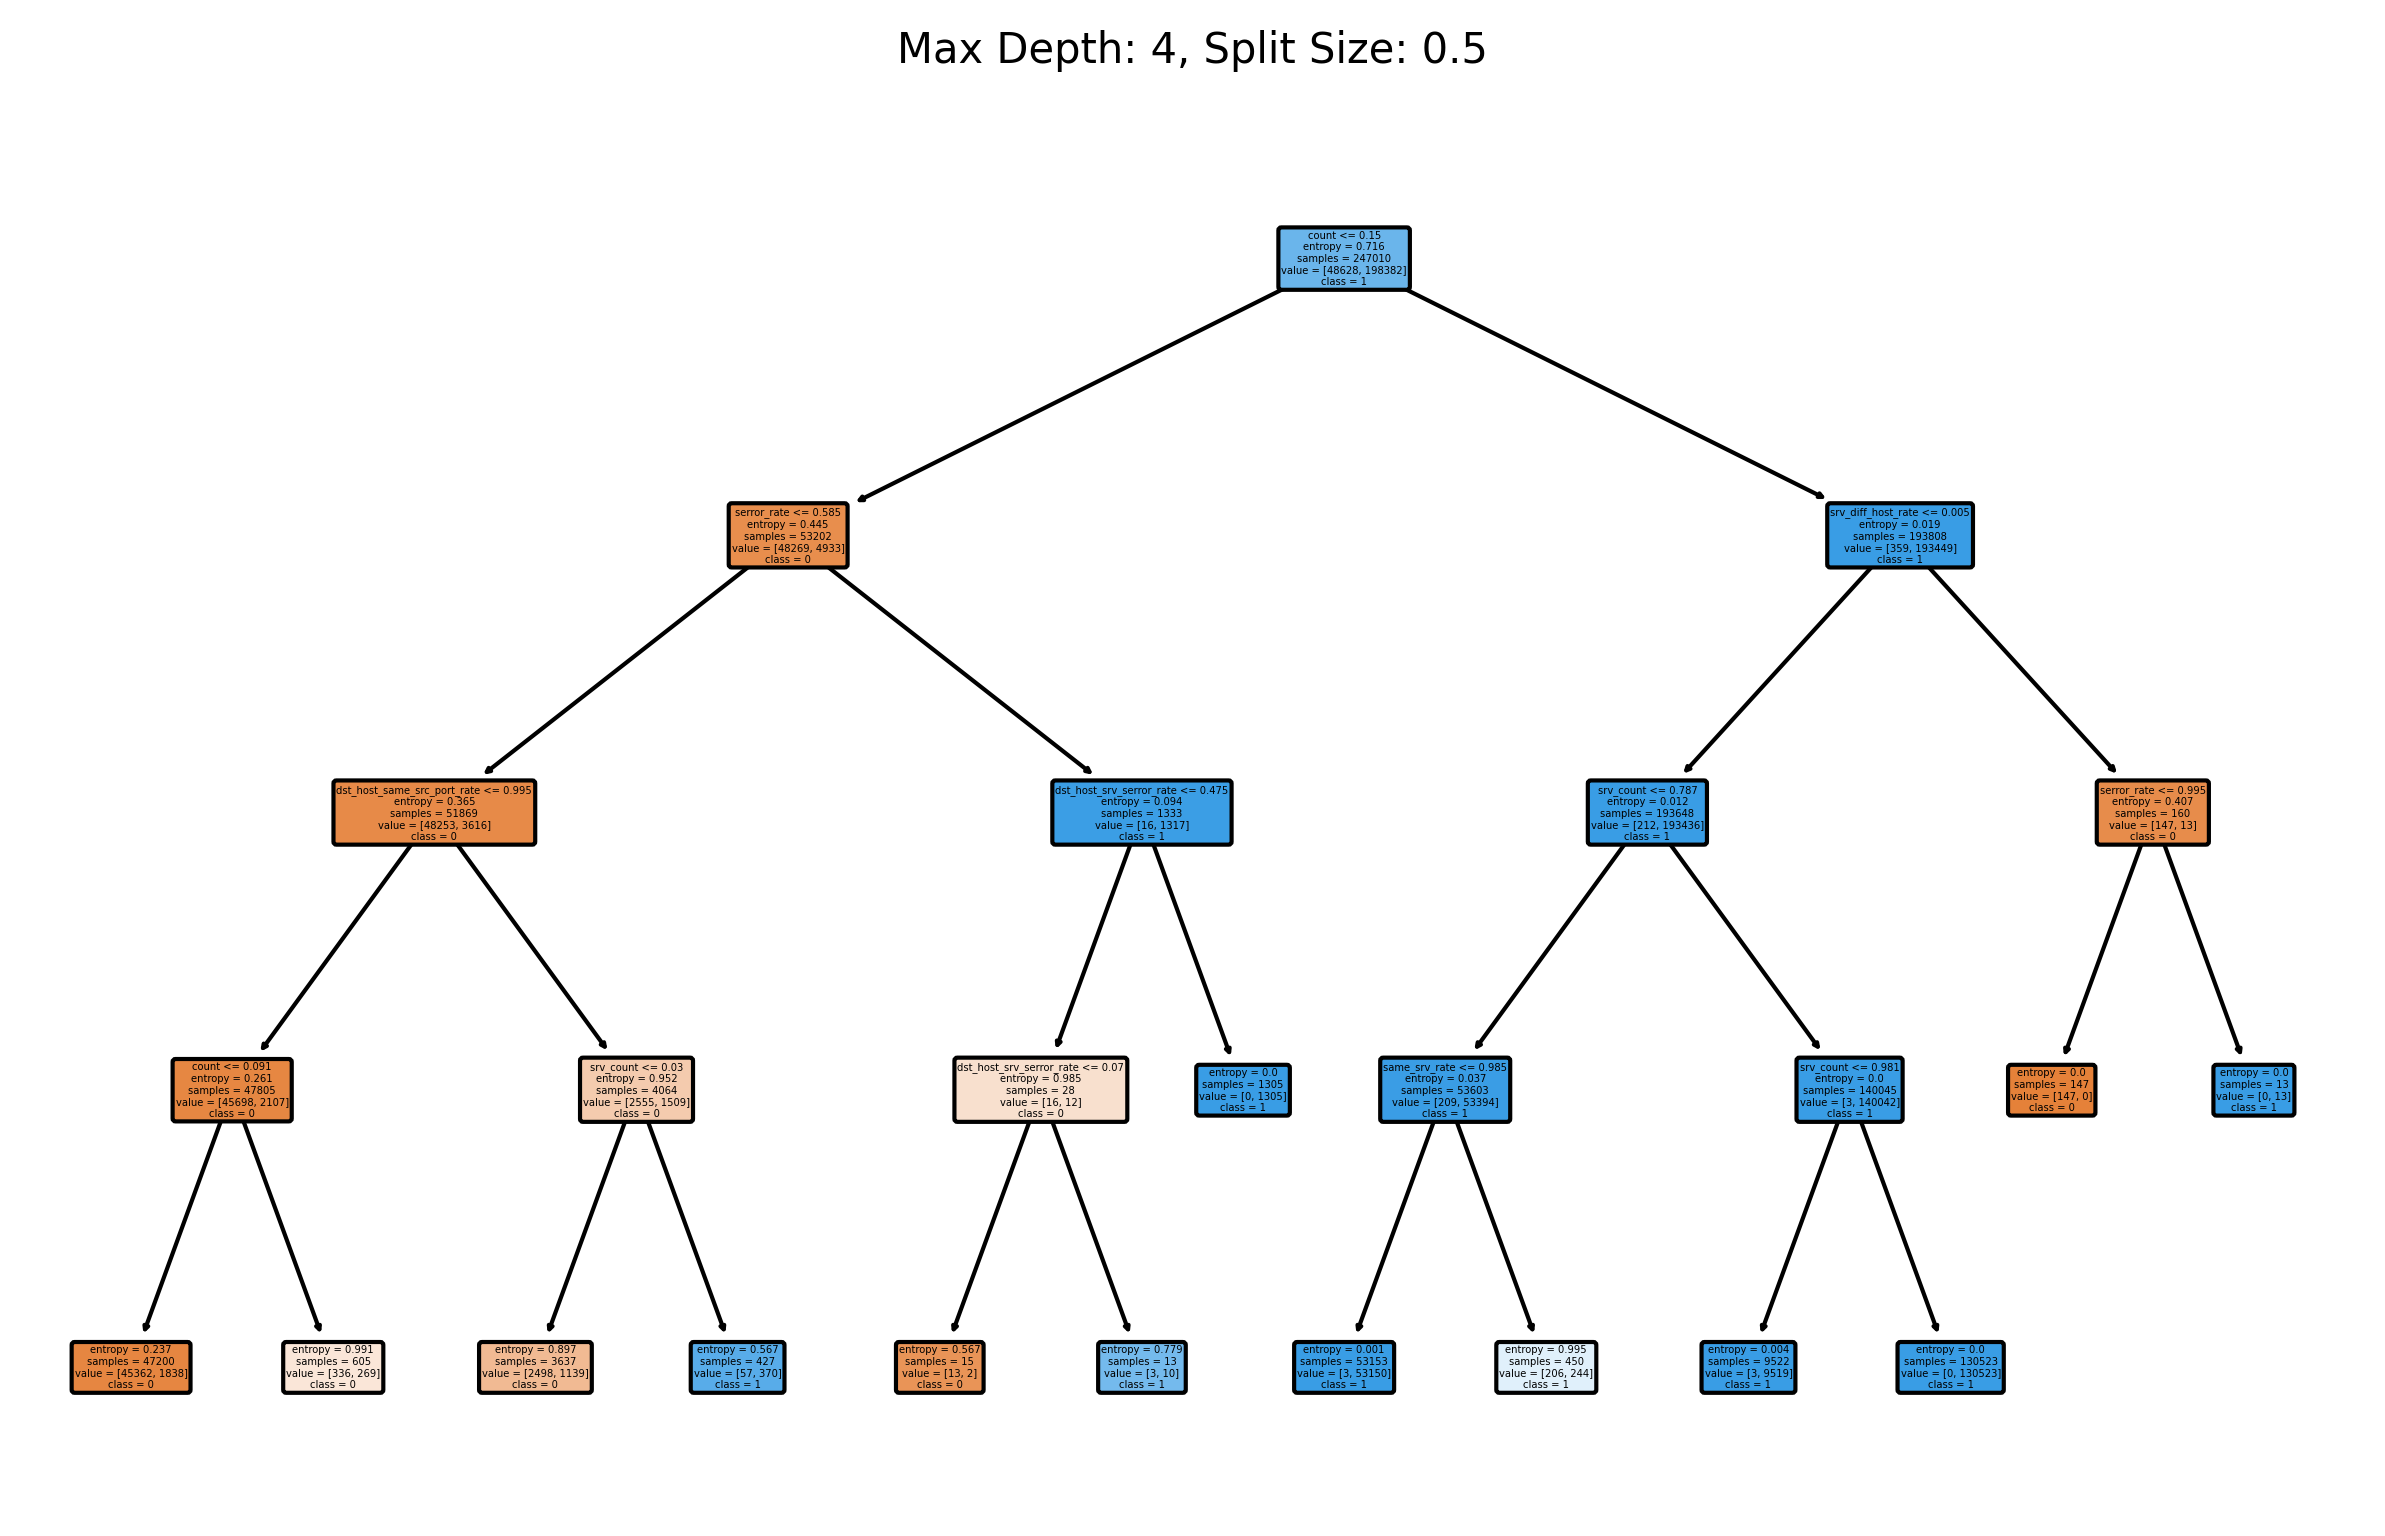

Accuracy: 98.6073494702665
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     48650
           1       1.00      0.98      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011

Confusion Matrix:


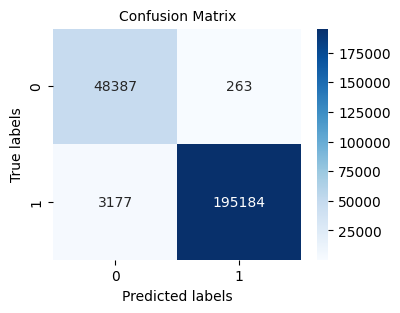

------------------------------------------------------------------------------------------------------------



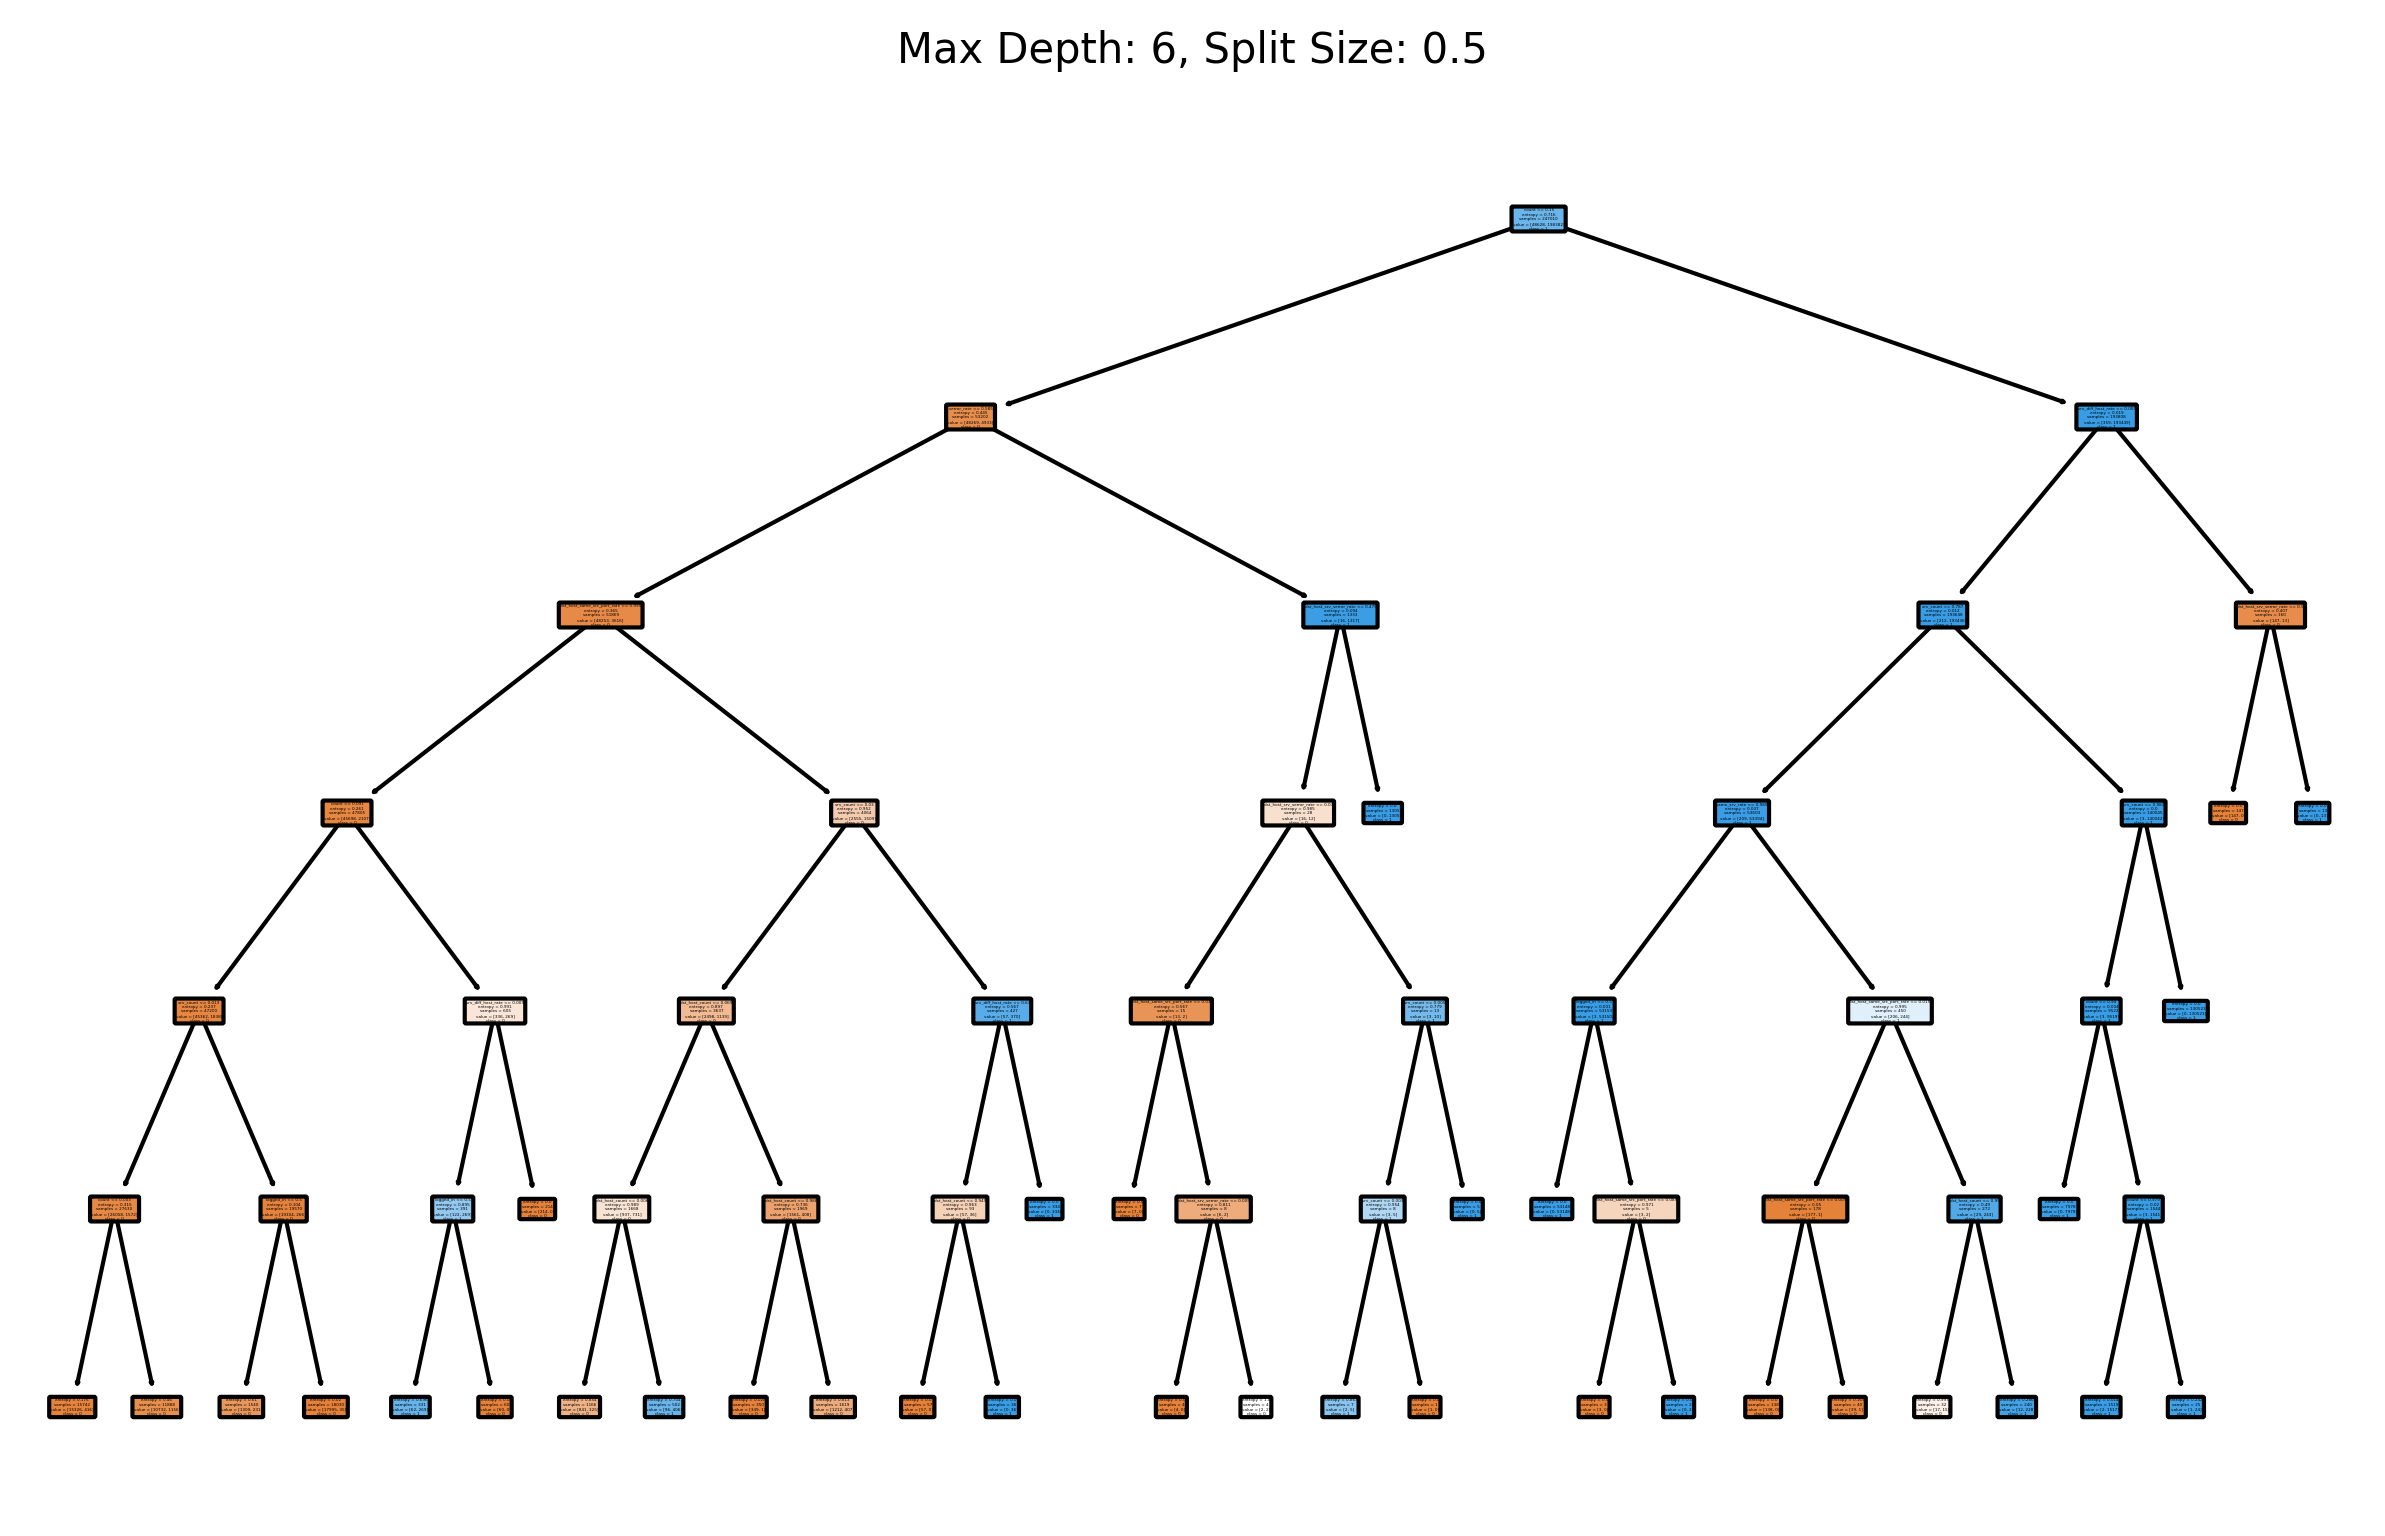

Accuracy: 98.89073765945646
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011

Confusion Matrix:


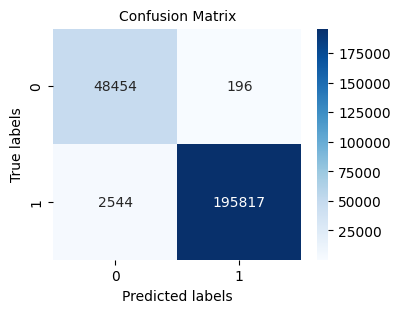

------------------------------------------------------------------------------------------------------------



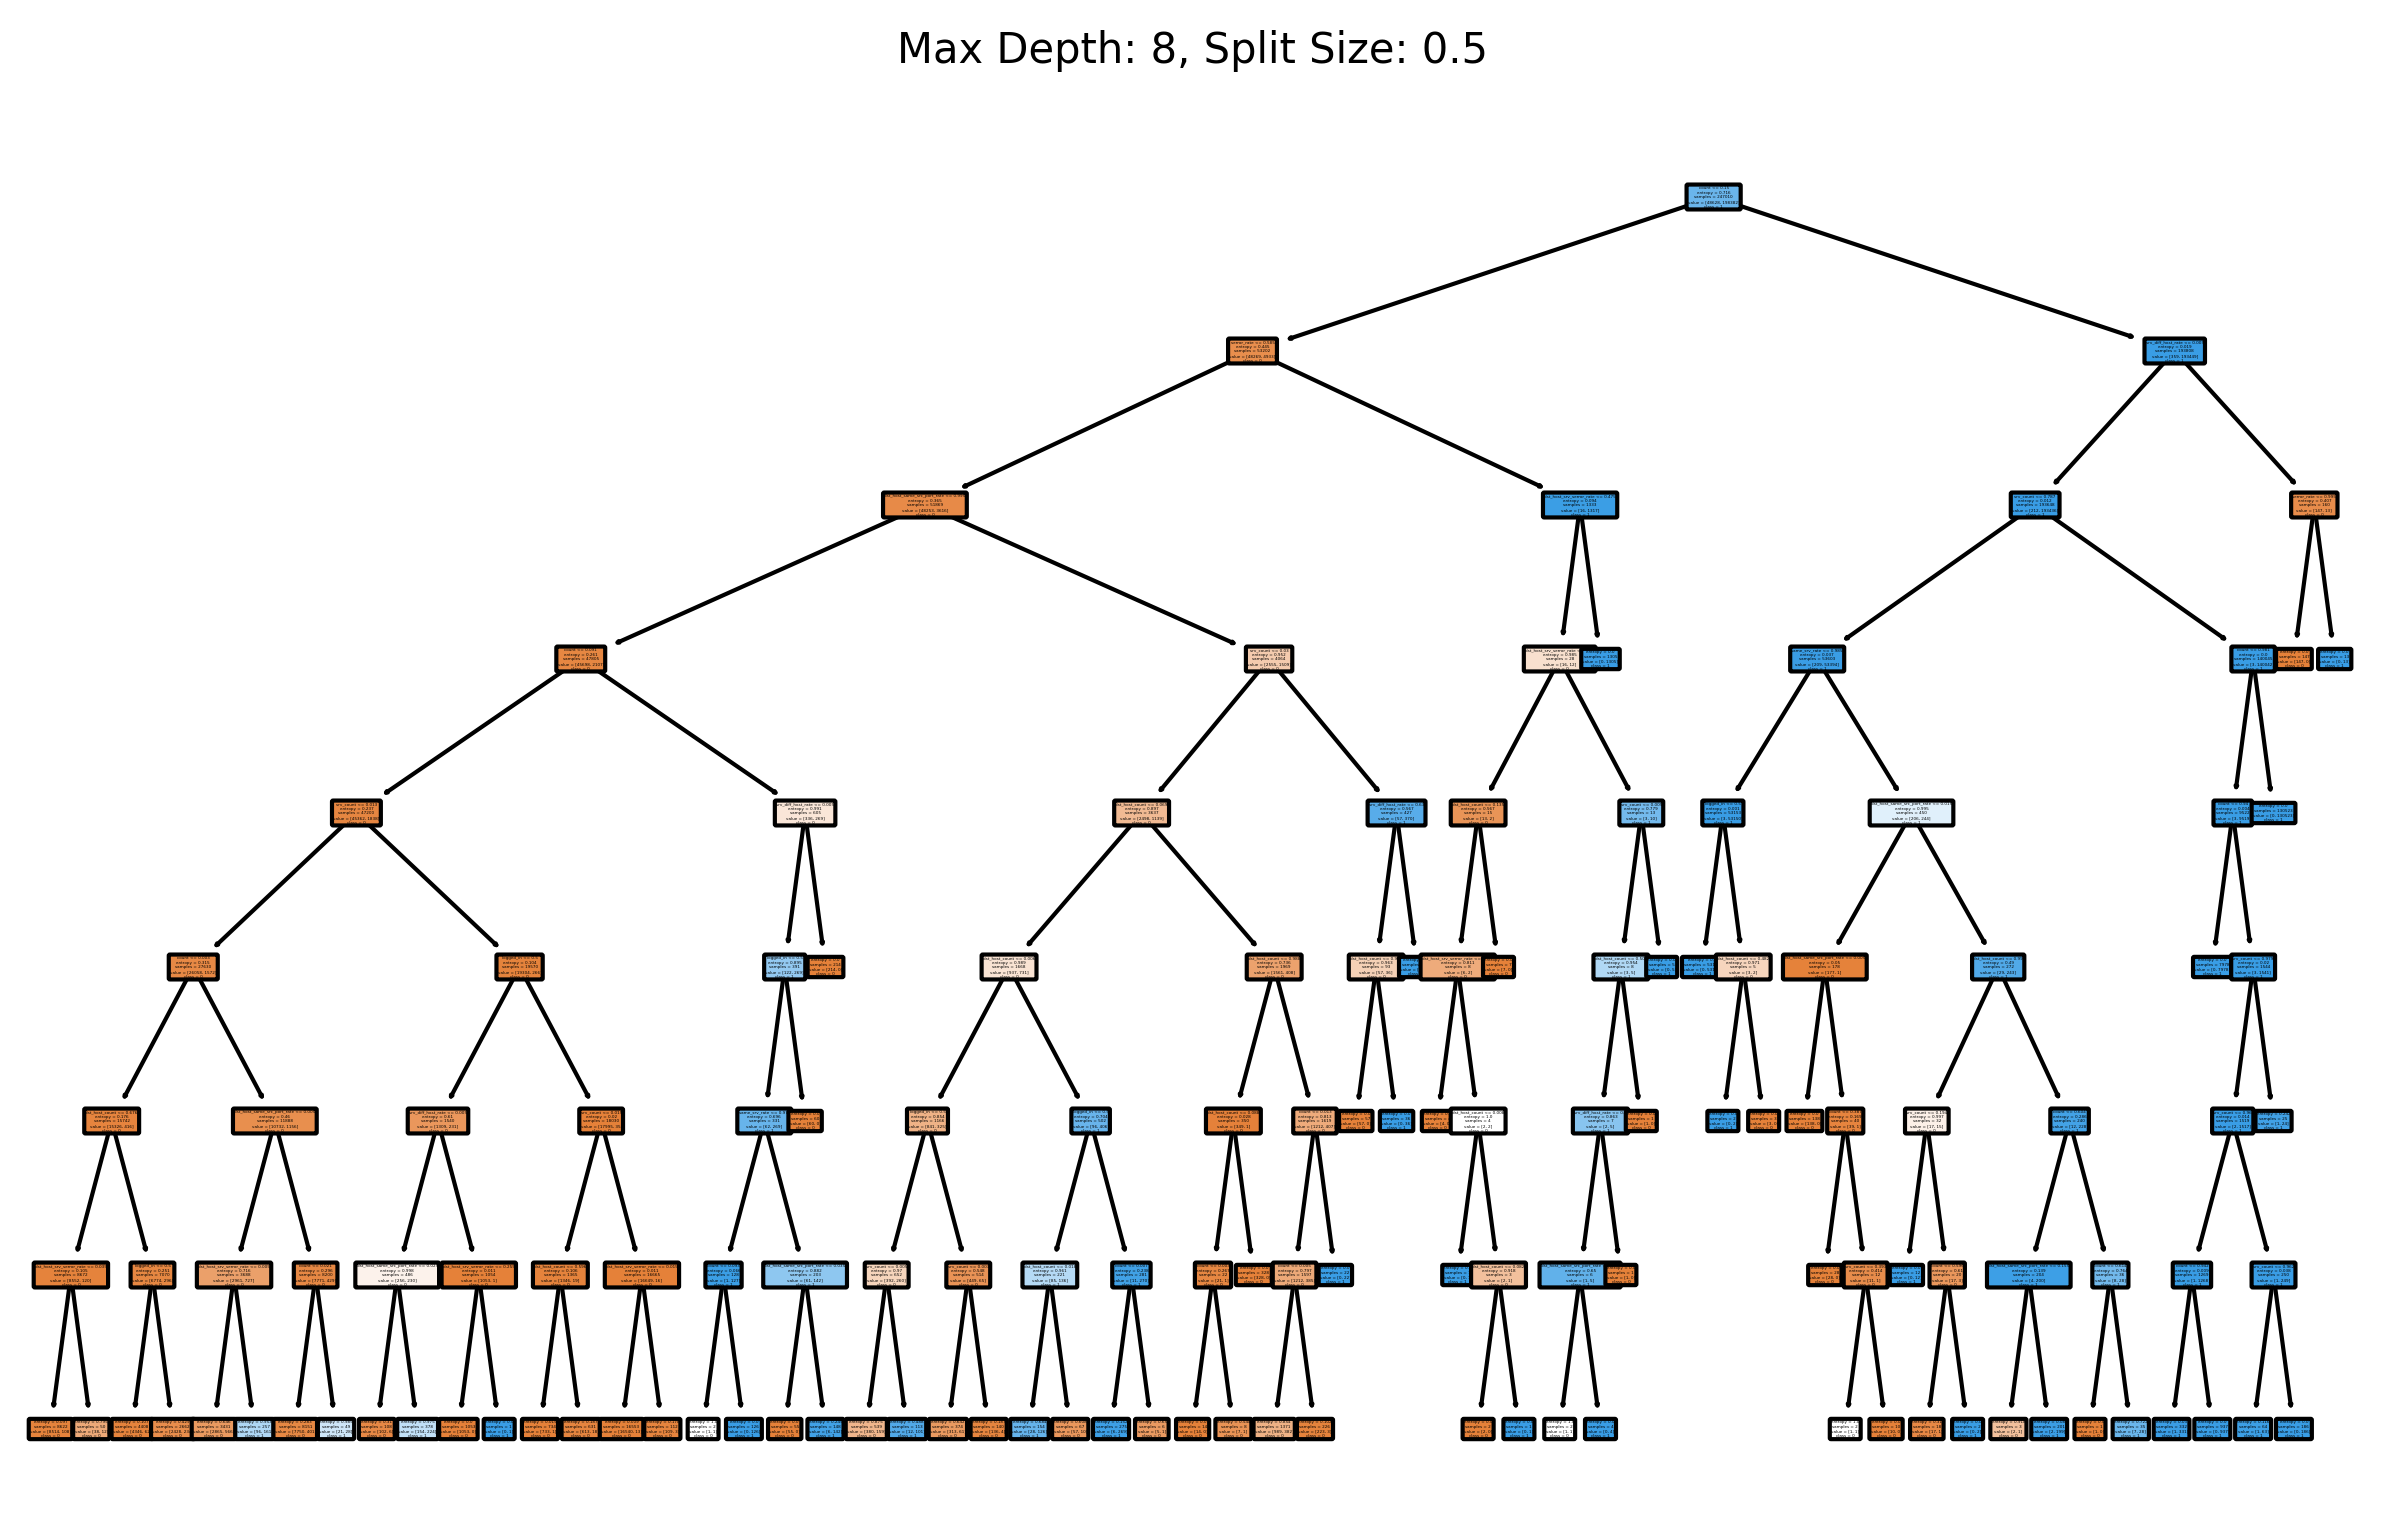

Accuracy: 99.04093339972714
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011

Confusion Matrix:


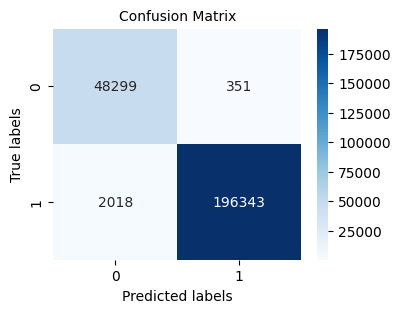

------------------------------------------------------------------------------------------------------------



In [ ]:
max_depths = [4, 6, 8]  # Pre-defined max_depths
for size in split_sizes:
    for depth in max_depths:
        x_train, x_test, y_train, y_test = split_data(x, y, size)
        decision_tree(x_train, y_train, x_test, y_test, depth, size)
        print("------------------------------------------------------------------------------------------------------------\n")

# **compare new tuned model**
**Iterating over the split sizes and splitting the data and print the Classification report for each split size with tuned parameters**

Classification Report for tuned model for my_data_1:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Accuracy: 99.01219240656648
Confusion Matrix:


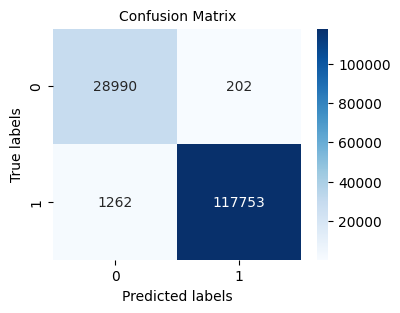

----------------------------------------------
Classification Report for tuned model for my_data_2:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Accuracy: 99.02484198594193
Confusion Matrix:


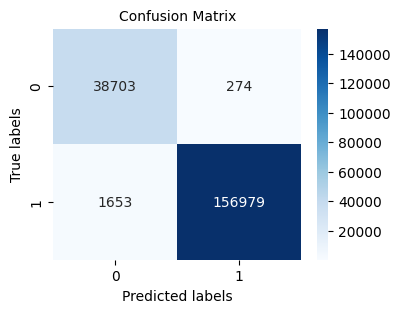

----------------------------------------------
Classification Report for tuned model for my_data_3:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011

Accuracy: 99.04093339972714
Confusion Matrix:


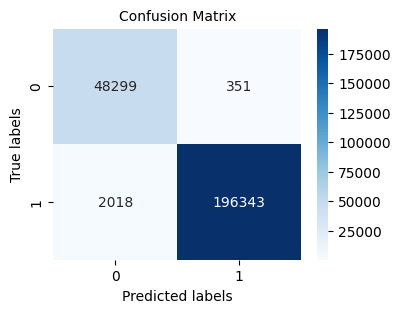

----------------------------------------------


In [ ]:
split_sizes = [0.3, 0.4, 0.5]#Pre-defined split sizes
for idx,size in enumerate(split_sizes):
    x_train, x_test, y_train, y_test = split_data(x,y,size)
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    class_rep = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classification Report for tuned model for my_data_{idx+1}:")
    print(class_rep)
    print("Accuracy:", accuracy * 100)
    print("Confusion Matrix:")
    cm = confusion_mx(y_test, y_pred)
    print("----------------------------------------------")

**F1 Score before mitigation techniques**

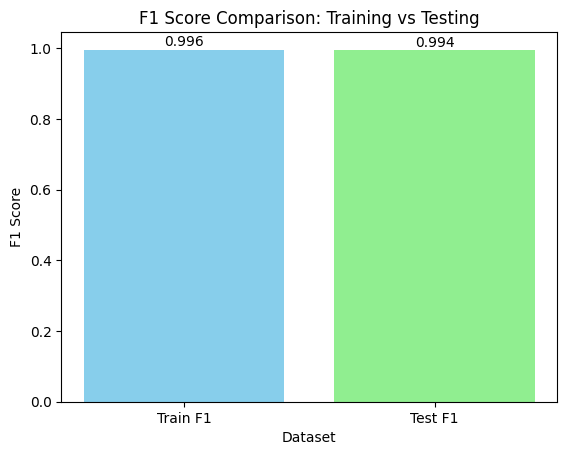

In [ ]:
x_train, x_test, y_train, y_test = split_data(x,y,0.3)
dtc = DecisionTreeClassifier(criterion='entropy' ,random_state=42)
dtc.fit(x_train, y_train)
train_pred_before = dtc.predict(x_train)
test_pred_before = dtc.predict(x_test)
train_f1 = f1_score(y_train, train_pred_before)
test_f1 = f1_score(y_test, test_pred_before)

labels = ['Train F1', 'Test F1']
f1_scores = [train_f1, test_f1]
plt.bar(labels, f1_scores, color=['skyblue', 'lightgreen'])
plt.xlabel('Dataset')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison: Training vs Testing')
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.3f}', ha='center')
plt.show()

# **Pre-Pruning**

In [ ]:
max_depths = range(1, 11)
train_pre_pruning = []
test_pre_pruning = []
for depth in max_depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(x_train, y_train)
    train_pred = clf.predict(x_train)
    test_pred = clf.predict(x_test)

    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    train_pre_pruning.append(train_f1)
    test_pre_pruning.append(test_f1)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(max_depths), y=train_pre_pruning, mode='lines+markers', name='Train'))
fig.add_trace(go.Scatter(x=list(max_depths), y=test_pre_pruning, mode='lines+markers', name='Test'))
fig.update_layout(
    title='Pre_Pruning',
    xaxis_title='Tree Depth',
    yaxis_title='F1 Score',
    legend_title='Dataset',
    hovermode='x',
    template='plotly_white',
    margin=dict(l=50, r=50, t=80, b=50))
fig.show()

# **Post-Pruning**

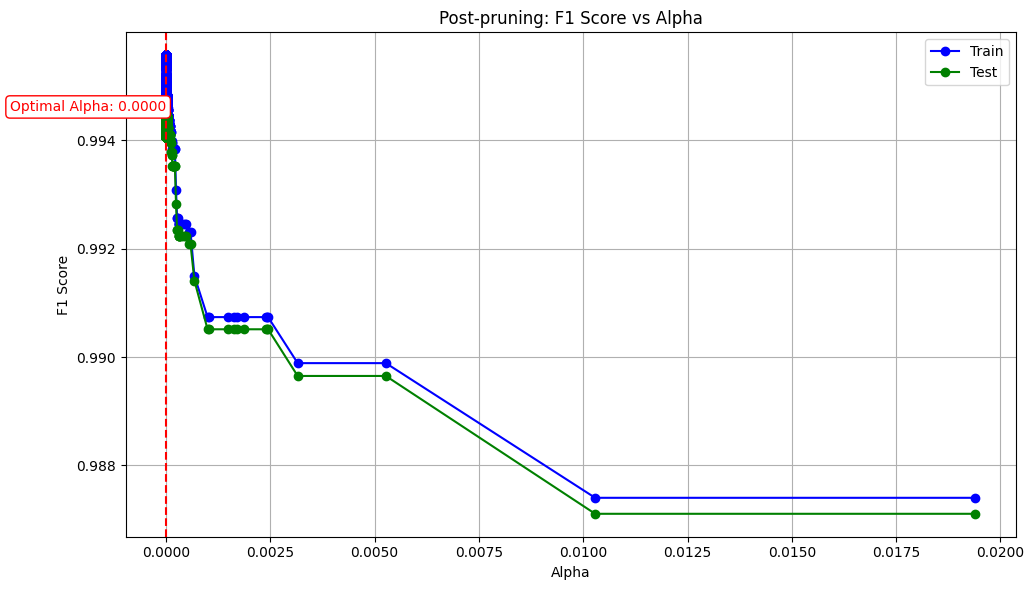

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy' ,random_state=42)
dtc.fit(x_train, y_train)
path = dtc.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
train_post_pruning = []
test_post_pruning = []

for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    dtc.fit(x_train, y_train)
    train_pred = dtc.predict(x_train)
    test_pred = dtc.predict(x_test)

    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    train_post_pruning.append(train_f1)
    test_post_pruning.append(test_f1)

optimal_alpha = ccp_alphas[np.argmax(test_post_pruning)]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_post_pruning, marker='o', label='Train', linestyle='-', color='blue')
plt.plot(ccp_alphas, test_post_pruning, marker='o', label='Test', linestyle='-', color='green')
plt.xlabel("Alpha")
plt.ylabel("F1 Score")
plt.title("Post-pruning: F1 Score vs Alpha")
plt.grid(True)
plt.tight_layout()
plt.axvline(x=optimal_alpha, color='red', linestyle='--')
plt.text(optimal_alpha, max(test_post_pruning), f'Optimal Alpha: {optimal_alpha:.4f}', color='red',
         verticalalignment='bottom', horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='red', boxstyle='round'))
plt.legend()
plt.show()

# **K-fold Cross Validation**

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy' ,random_state=42)
k_values = range(2, 11)
train_kfold = []
test_kfold = []
for k in k_values:
    train_scores = cross_val_score(dtc, x_train, y_train, cv=k, scoring='f1')
    test_scores = cross_val_score(dtc, x_test, y_test, cv=k, scoring='f1')
    train_kfold.append(np.mean(train_scores))
    test_kfold.append(np.mean(test_scores))

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(k_values), y=train_kfold, mode='lines+markers', name='Train'))
fig.add_trace(go.Scatter(x=list(k_values), y=test_kfold, mode='lines+markers', name='Test'))
fig.update_layout(
    title='K-fold Cross-validation: F1 Score vs k',
    xaxis_title='k',
    yaxis_title='F1 Score',
    hovermode='x',
    template='plotly_white'
)
fig.show()

# **Comparison**
### Compare between the values of F1 Score before mitigating, after Pre-Pruning, after Post-Pruning and after K-Fold Cross Validation

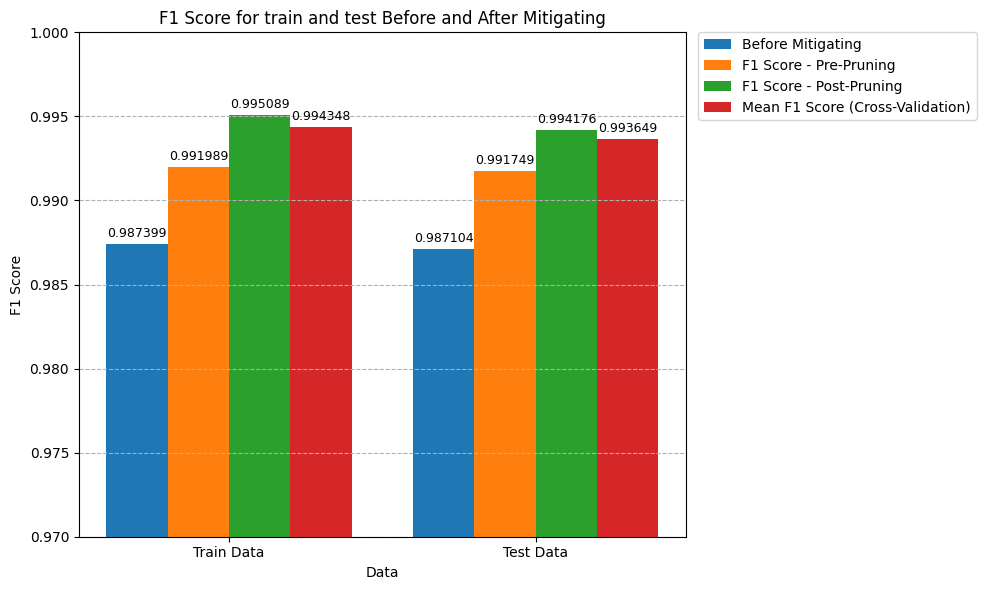

In [ ]:
f1_scores_before = [train_f1, test_f1]
f1_pre_pruning = [np.mean(train_pre_pruning), np.mean(test_pre_pruning)]
f1_post_pruning = [np.mean(train_post_pruning), np.mean(test_post_pruning)]
f1_kfold = [np.mean(train_kfold), np.mean(test_kfold)]

labels = ['Train Data', 'Test Data']
x = range(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bars1 = ax.bar(x, f1_scores_before, width, label='Before Mitigating', color=colors[0])
bars2 = ax.bar([val + width for val in x], f1_pre_pruning, width, label='F1 Score - Pre-Pruning', color=colors[1])
bars3 = ax.bar([val + width * 2 for val in x], f1_post_pruning, width, label='F1 Score - Post-Pruning', color=colors[2])
bars4 = ax.bar([val + width * 3 for val in x], f1_kfold, width, label='Mean F1 Score (Cross-Validation)', color=colors[3])

ax.grid(axis='y', linestyle='--')
ax.set_ylim(0.97, 1)
ax.set_ylabel('F1 Score')
ax.set_xlabel('Data')
ax.set_title('F1 Score for train and test Before and After Mitigating')
ax.set_xticks([val + width * 1.5 for val in x])
ax.set_xticklabels(labels)

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()
